<a href="https://colab.research.google.com/github/mikehviz/Bike_Trail_Proj/blob/main/Data100Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse) 
install.packages("tidytext")
library(tidytext)
install.packages("textdata")
library(textdata)
library(dplyr)
library(ggplot2)
install.packages("reshape2")
library(reshape2)
library(stringr)
install.packages("partykit")
library(partykit)
install.packages("wordcloud")
library(wordcloud)
install.packages("ggplot2")
library(ggplot2)
install.packages("ggfortify")
library(ggfortify)
install.packages("factoextra")
library("factoextra")
install.packages("corrplot")
library("corrplot")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘SnowballC’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Installing package 

# Reading In Data 

In [ ]:
railtrail <- read.csv("https://docs.google.com/spreadsheets/d/1Ic2vNX9grY14Mm0eg2MC5W4Uf6FoJJDt46kgf0t7Lwk/export?format=csv")

head(railtrail)


,X,hightemp,lowtemp,avgtemp,spring,summer,fall,cloudcover,precip,volume,weekday,dayType
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<lgl>,<chr>
1,1,83,50,66.5,0,1,0,7.6,0.00,501,TRUE,weekday
2,2,73,49,61.0,0,1,0,6.3,0.29,419,TRUE,weekday
3,3,74,52,63.0,1,0,0,7.5,0.32,397,TRUE,weekday
4,4,95,61,78.0,0,1,0,2.6,0.00,385,FALSE,weekend
5,5,44,52,48.0,1,0,0,10.0,0.14,200,TRUE,weekday
6,6,69,54,61.5,1,0,0,6.6,0.02,375,TRUE,weekday


In [ ]:
nhp_reviews <- read.csv("https://docs.google.com/spreadsheets/d/1Nr34hFXtvRKkbAnXANxssjrAV5Fm7FvfYbqyI-2lTVo/export?format=csv")

head(nhp_reviews,3)

,X,X.1,Author,Date,Rating,Helpful.count,Review,Picture.included,Language,X.view.source.
,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,NA,Sacha Mami,25/12/16,5,2,Great path to walk or ride your bike on . It also helps to give you a break from the traffic,no,e,view review
2,2,NA,Jessica Fernandez,30/11/17,5,0,,no,e,view review
3,3,NA,Sener Dere,22/04/18,5,0,This is an old rail trail. It connects Northampton to Amherst. There is beautiful bridge and ice cream place near by.,no,e,view review


In [ ]:
nwt_reviews <- read.csv("https://docs.google.com/spreadsheets/d/1ydZd_y9BBIIFgdGcAejSSefA2QnqspZdMmOpSgHtSQA/export?format=csv")

head(nwt_reviews,3)

,X,X.1,Author,Date,Rating,Helpful.count,Review,Picture.included,Language,X.view.source.
,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<lgl>,<chr>
1,1,NA,Brendan Sullivan,21/07/16,5,0,Well maintained riding trail that links into other paved trail networks.,no,NA,view review
2,2,NA,Emma Rudié,28/09/16,5,0,"Love this trail for walking, biking, and running! Stretches on forever! Beautiful woodlands and farmlands.",no,NA,view review
3,3,NA,Kirt Senser,08/10/16,4,0,,no,NA,view review


#Filtering out stop_words for northhampton and norwottuck trail

In [ ]:

nhp_stock <- 
  nhp_reviews %>%
  unnest_tokens(word, Review)%>%  
  mutate(word=tolower(word)) %>%
  anti_join(stop_words, by="word") %>% 
  select(word)

head(nhp_stock, 3)


nwt_stock <- 
  nwt_reviews %>%
  unnest_tokens(word, Review)%>%  
  mutate(word=tolower(word)) %>%
  anti_join(stop_words, by="word") %>% 
  select(word)

head(nwt_stock, 3)

,word
,<chr>
1,path
2,walk
3,ride


,word
,<chr>
1,maintained
2,riding
3,trail


#Finding the top useful words for each data set

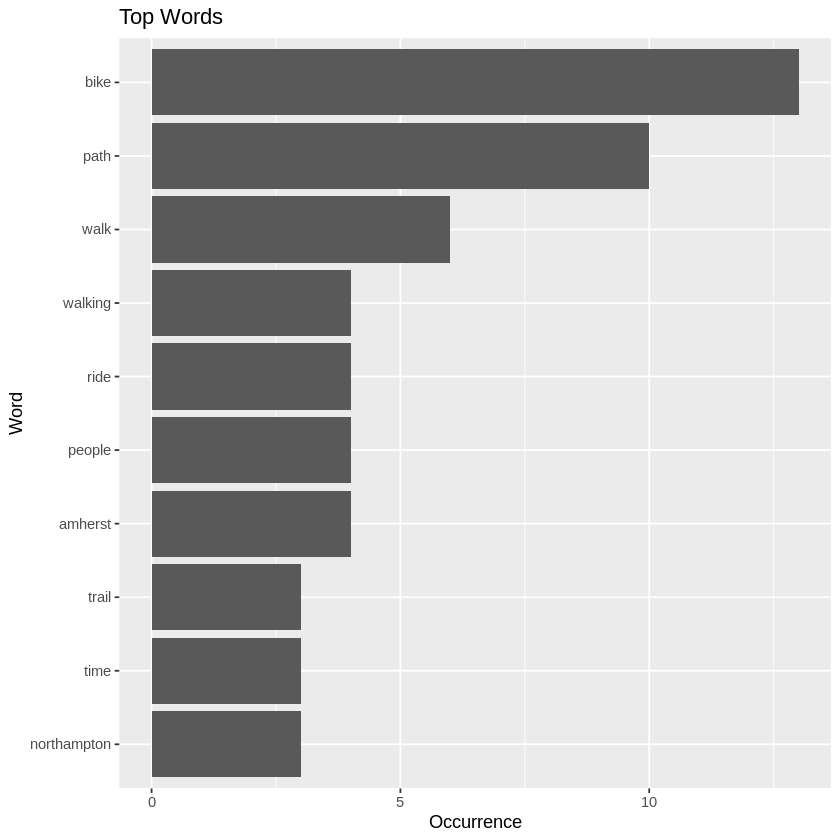

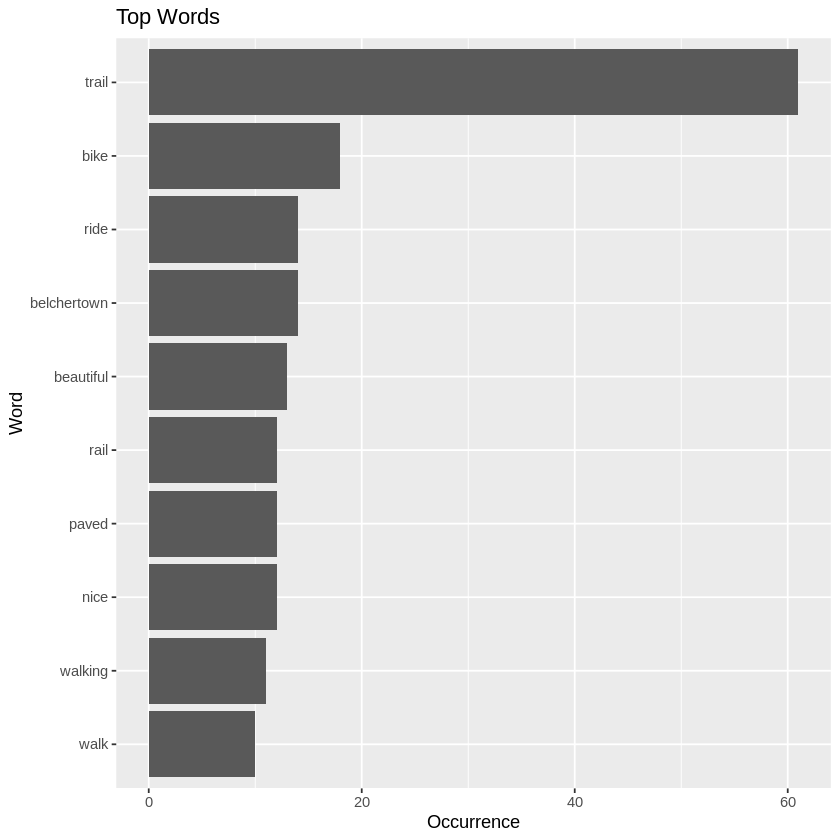

In [ ]:
nhp_stock %>%
  count(word) %>%
   mutate(word = reorder(word, n))  %>%
  slice_max(word, n=10)   %>%
  ggplot() +
    geom_col(aes(x = word, y = n)) +
  labs(x = "Word", y= "Occurrence", title = "Top Words") +
  coord_flip()



my_exclude_vector <- c("googleusercontent.com","https", "h150", "w150", "lh5")

my_exclude_df <- data.frame(word=my_exclude_vector, stringsAsFactors = FALSE)

nwt_excludewords_stocks <-nwt_stock %>%
   anti_join(my_exclude_df, by="word")

nwt_excludewords_stocks %>%
  count(word) %>%
   mutate(word = reorder(word, n))  %>%
  slice_max(word, n=10)   %>%
  ggplot() +
    geom_col(aes(x = word, y = n)) +
  labs(x = "Word", y= "Occurrence", title = "Top Words") +
  coord_flip()

#Finding the postive and negative words using Bing

In [ ]:
bing_nhp_words <- nhp_stock %>%
  inner_join(get_sentiments("bing"), by="word")

bing_nhp_words %>%
  count(sentiment, sort=TRUE)

9/24 * 100



bing_nwt_words <- nwt_excludewords_stocks %>%
  inner_join(get_sentiments("bing"), by="word")

bing_nwt_words %>%
  count(sentiment, sort=TRUE)

26/96 *100

sentiment,n
<chr>,<int>
positive,24
negative,9


[1] 37.5

sentiment,n
<chr>,<int>
positive,96
negative,26


[1] 27.08333

#Time to create word clouds for each data set!

Warning message in comparison.cloud(., colors = c("blue", "green"), max.words = 10):
“disrespectful could not be fit on page. It will not be plotted.”


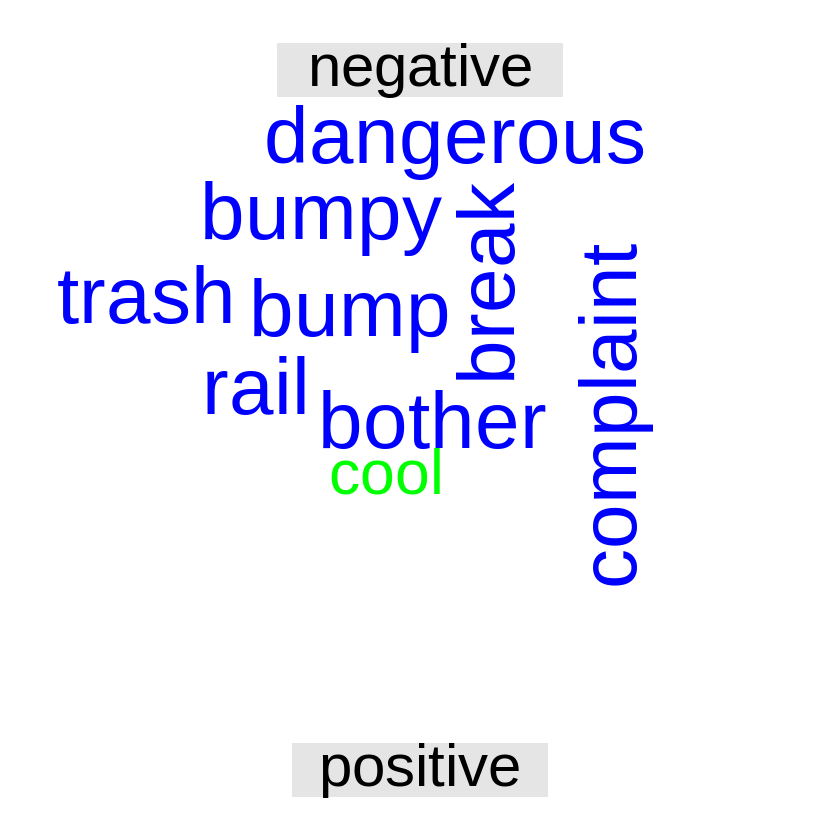

In [ ]:
bing_nhp_words %>%
  count(word, sentiment, sort=TRUE) %>%
  acast(word ~ sentiment, value.var = 'n', fill=0) %>%
  comparison.cloud(colors= c("blue", "green"), max.words=10)


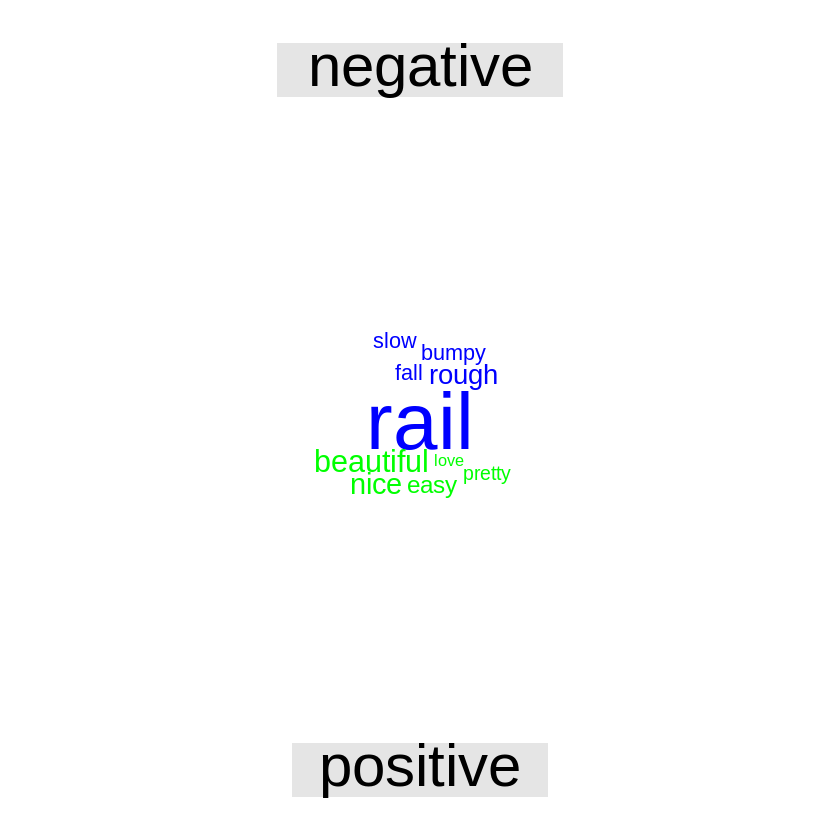

In [ ]:
bing_nwt_words %>%
  count(word, sentiment, sort=TRUE) %>%
  acast(word ~ sentiment, value.var = 'n', fill=0) %>%
  comparison.cloud(colors= c("blue", "green"), max.words=10)

#Read in Afinn Data and analyze each set of reviews 

In [ ]:
system("gdown --id 1pKBUx_HscqpRPJgAfDR2_2eCUflpYg3v")  
afinn<-as_tibble(read.csv("afinn.csv"))

     value       
 Min.   :-3.000  
 1st Qu.: 1.000  
 Median : 3.000  
 Mean   : 2.063  
 3rd Qu.: 3.000  
 Max.   : 4.000  

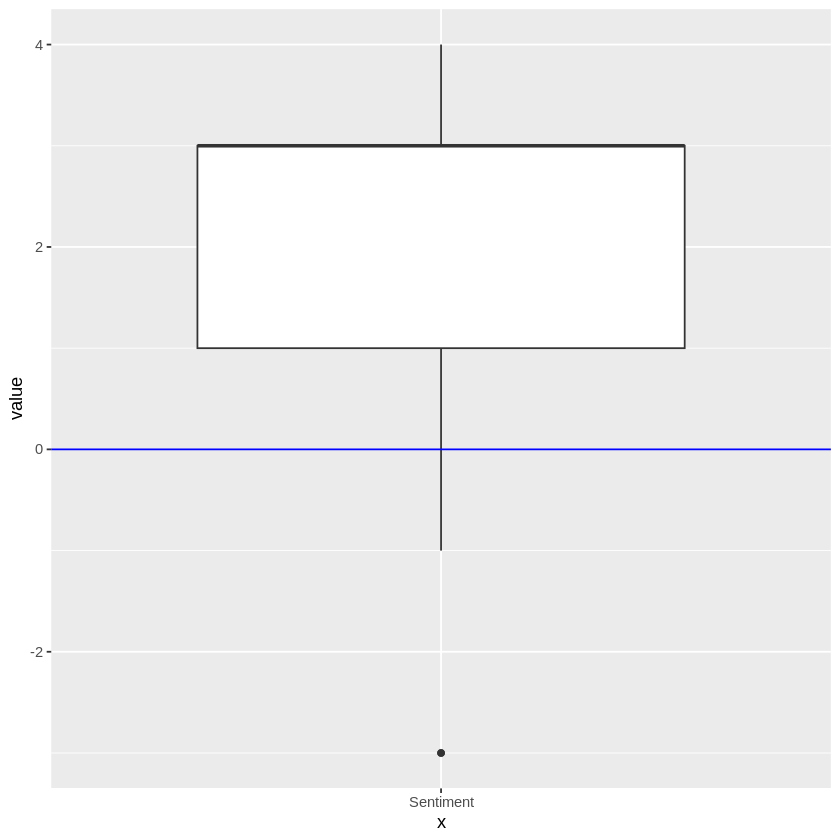

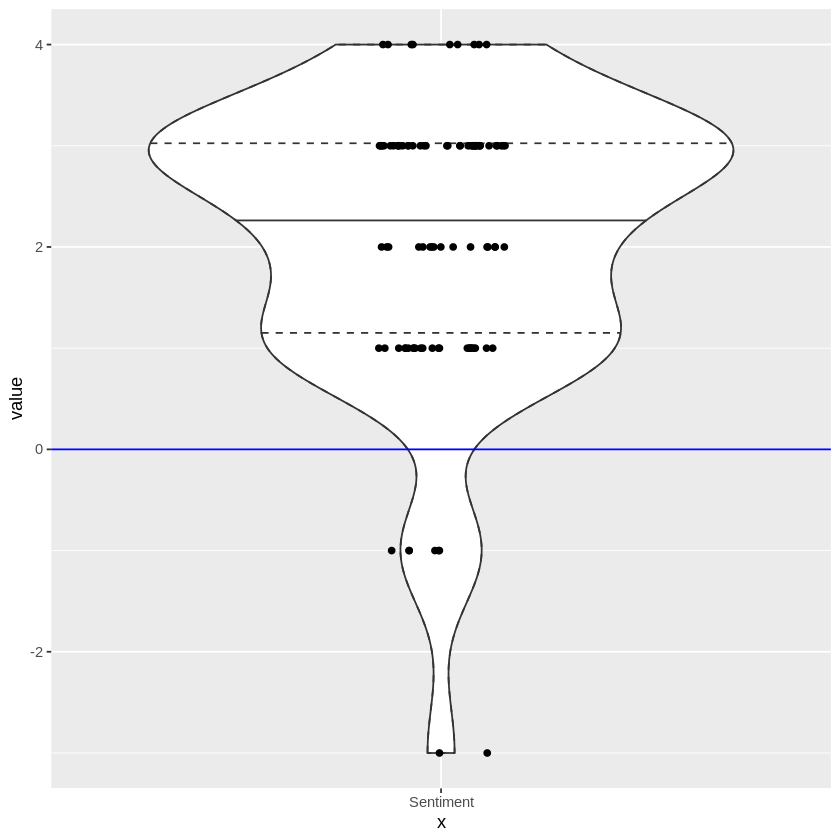

In [ ]:
#nwt reviews analyzed with afinn
nwt_noexclude_words <- nwt_reviews %>%
  unnest_tokens(word, Review) %>%
  anti_join(stop_words, by = "word")
afinn_nwt <- nwt_noexclude_words %>%
  inner_join(afinn, by = "word") %>%
  select(value, word)
afinn_nwt %>%
  select(value) %>%
  summary()
afinn_nwt %>%
  ggplot() +
  geom_boxplot(aes(x = "Sentiment", y = value)) +
  geom_hline(aes(yintercept = 0), color = "blue")
afinn_nwt %>%
  ggplot(aes(x = "Sentiment", y = value)) +
  geom_violin(draw_quantiles = c(.25, .75), linetype = "dashed") +
  geom_violin(fill = "transparent", draw_quantiles = c(.5)) +
  geom_jitter(height = 0, width = .1) +
  geom_hline(aes(yintercept = 0), color = "blue")


  

     value       
 Min.   :-2.000  
 1st Qu.: 2.000  
 Median : 2.000  
 Mean   : 2.192  
 3rd Qu.: 3.000  
 Max.   : 4.000  

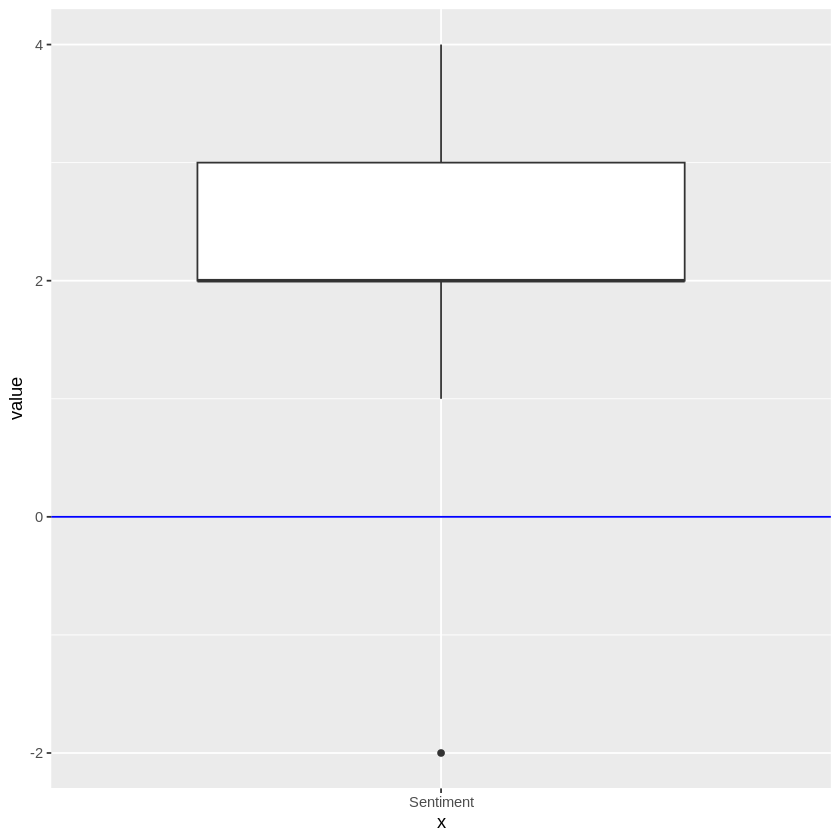

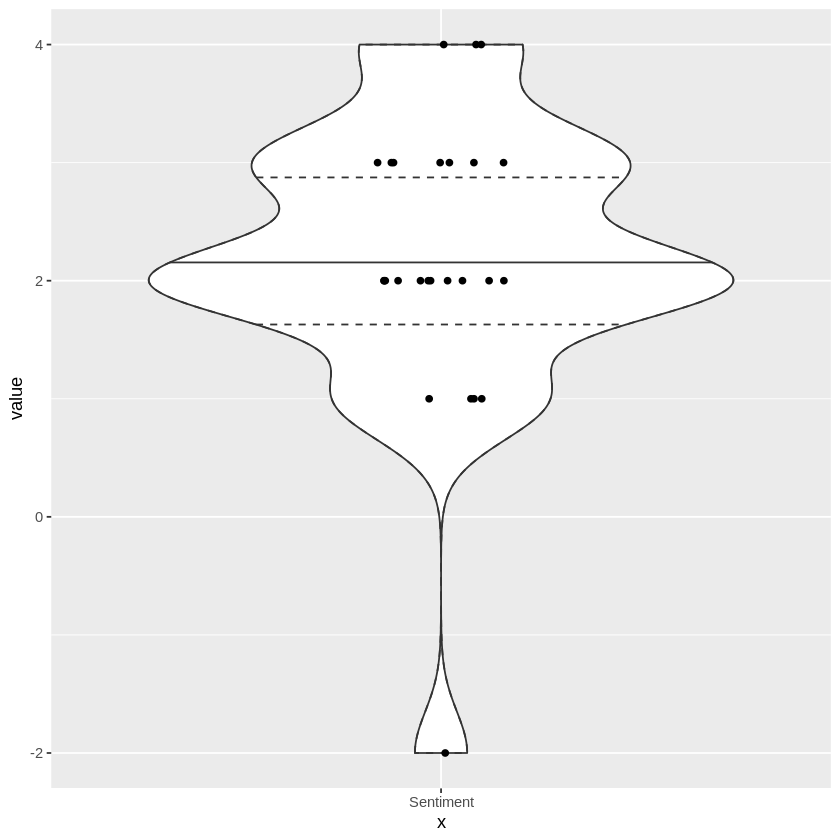

In [ ]:
#nhp reviews analyzed with afinn
nhp_noexclude_words <- nhp_reviews %>%
  unnest_tokens(word, Review) %>%
  anti_join(stop_words, by = "word")
afinn_nhp <- nhp_noexclude_words %>%
  inner_join(afinn, by = "word") %>%
  select(value, word)
afinn_nhp %>%
  select(value) %>%
  summary
afinn_nhp %>%
  ggplot() +
  geom_boxplot(aes(x = "Sentiment", y = value)) +
  geom_hline(aes(yintercept = 0), color = "blue")
afinn_nhp %>%
  ggplot(aes(x = "Sentiment", y = value)) +
 geom_violin(draw_quantiles = c(.25, .75), linetype = "dashed") +
 geom_violin(fill = "transparent", draw_quantiles = c(.5)) +
  
  geom_jitter(height = 0, width = .1) 

#Find the average for each season and summarize it

In [ ]:
#this identifies the average temperature for each season.
#summer 
railtrail_avg_temp_summer <- railtrail %>% 
  select(hightemp,	lowtemp, avgtemp) %>% 
  filter(avgtemp >= 60.0)
head(railtrail_avg_temp_summer, 5)

#spring
railtrail_avg_temp_spring <- railtrail %>% 
  select(hightemp,	lowtemp, avgtemp) %>% 
  filter(avgtemp < 60.0 & avgtemp >= 40.0)
head(railtrail_avg_temp_spring, 5)

#fall 
railtrail_avg_temp_fall <- railtrail %>% 
  select(hightemp,	lowtemp, avgtemp) %>% 
  filter(avgtemp < 40.0 & avgtemp)
head(railtrail_avg_temp_fall, 5)

,hightemp,lowtemp,avgtemp
,<int>,<int>,<dbl>
1,83,50,66.5
2,73,49,61.0
3,74,52,63.0
4,95,61,78.0
5,69,54,61.5


,hightemp,lowtemp,avgtemp
,<int>,<int>,<dbl>
1,44,52,48.0
2,66,39,52.5
3,66,38,52.0
4,65,48,56.5
5,41,49,45.0


,hightemp,lowtemp,avgtemp
,<int>,<int>,<dbl>
1,42,37,39.5
2,46,30,38.0
3,51,19,35.0
4,41,25,33.0


In [ ]:
#the averag temp for each
railtrail_avg_temp_summer %>% 
  summarize(mean(avgtemp))

railtrail_avg_temp_spring %>% 
  summarize(mean(avgtemp))

railtrail_avg_temp_fall %>% 
  summarize(mean(avgtemp))

mean(avgtemp)
<dbl>
68.60811


mean(avgtemp)
<dbl>
50.71429


mean(avgtemp)
<dbl>
36.375


#Compare temp and precip to cloudcover seperatley

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


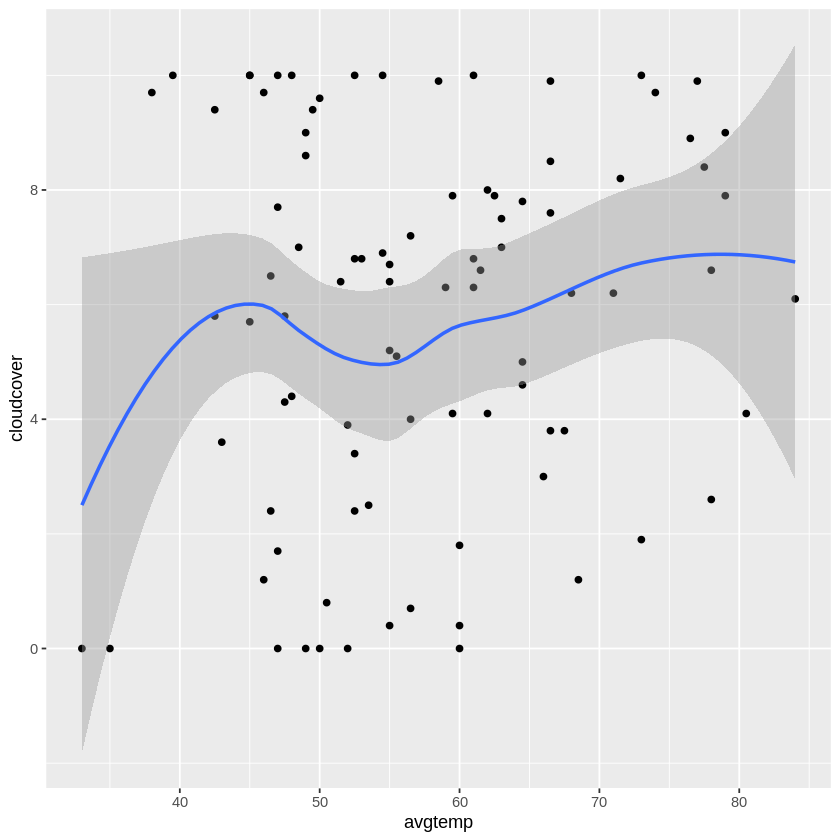

In [ ]:
#cloud cover compared to temp
railtrail %>%
  select(avgtemp, cloudcover) %>%

ggplot(aes(x=avgtemp, y=cloudcover)) +
  geom_point() +
  geom_smooth()
#no correlation at all

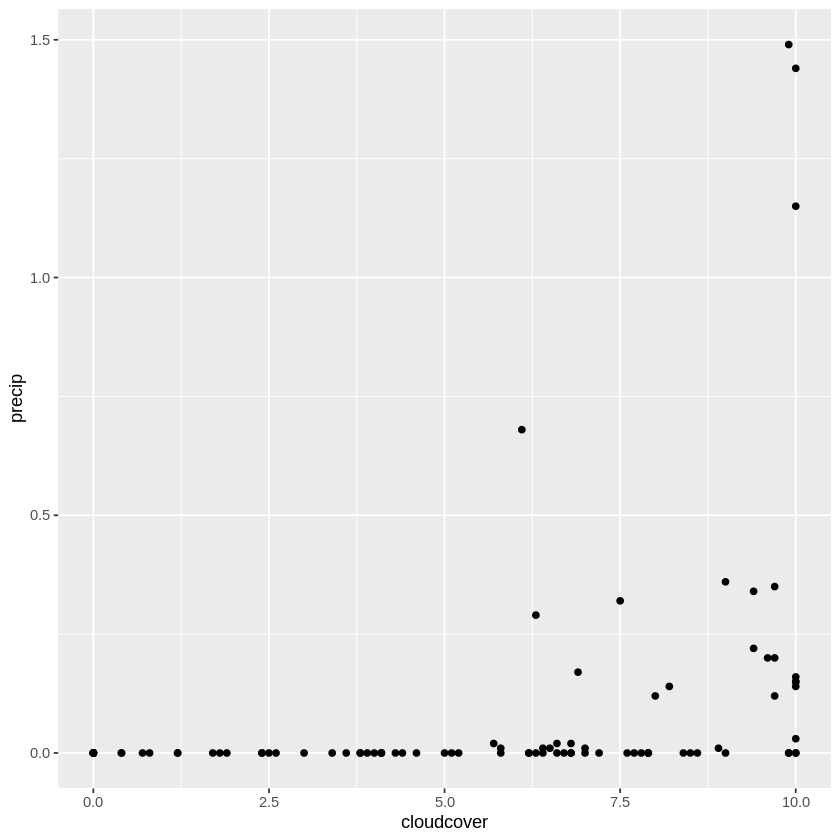

In [ ]:
#rain compared to cloudcover
railtrail %>%
  select(precip, cloudcover) %>%

ggplot(aes(x=cloudcover, y=precip)) +
  geom_point() 
#as cloud cover increases so does precipitation

#Find the most helpful reviews and count them per person, then graph it

In [ ]:
#gathers the helpful reviews to graph which person is the most helpful
nhp_reviews_helpfullness <- nhp_reviews %>% 
  select(Author, Helpful.count) %>%
  group_by(Author) %>%
  filter(Helpful.count > 0) %>%
  arrange(desc(Helpful.count))
nhp_reviews_helpfullness

nwt_reviews_helpfullness <- nwt_reviews %>% 
  select(Author, Helpful.count) %>%
  group_by(Author) %>%
  filter(Helpful.count > 0) %>%
  arrange(desc(Helpful.count))
nwt_reviews_helpfullness


Author,Helpful.count
<chr>,<int>
Daniel Tat,3
Sacha Mami,2
Mike Godin,2
Jesse Rodrigue,1


Author,Helpful.count
<chr>,<int>
Lisa DeWitt,3
Michael L,3
Karen Roberts,2
Ted Wood,2
AnnaLee Rossi,2
Tim Schroeder,1
Leisa Keiser,1
Bob Persons,1
Will Brown,1


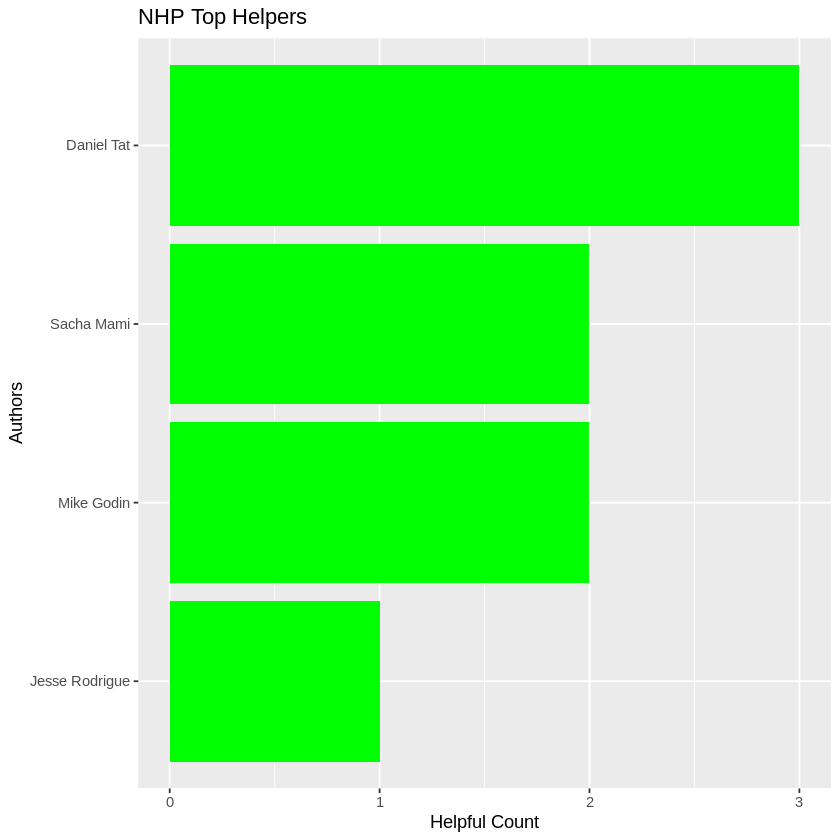

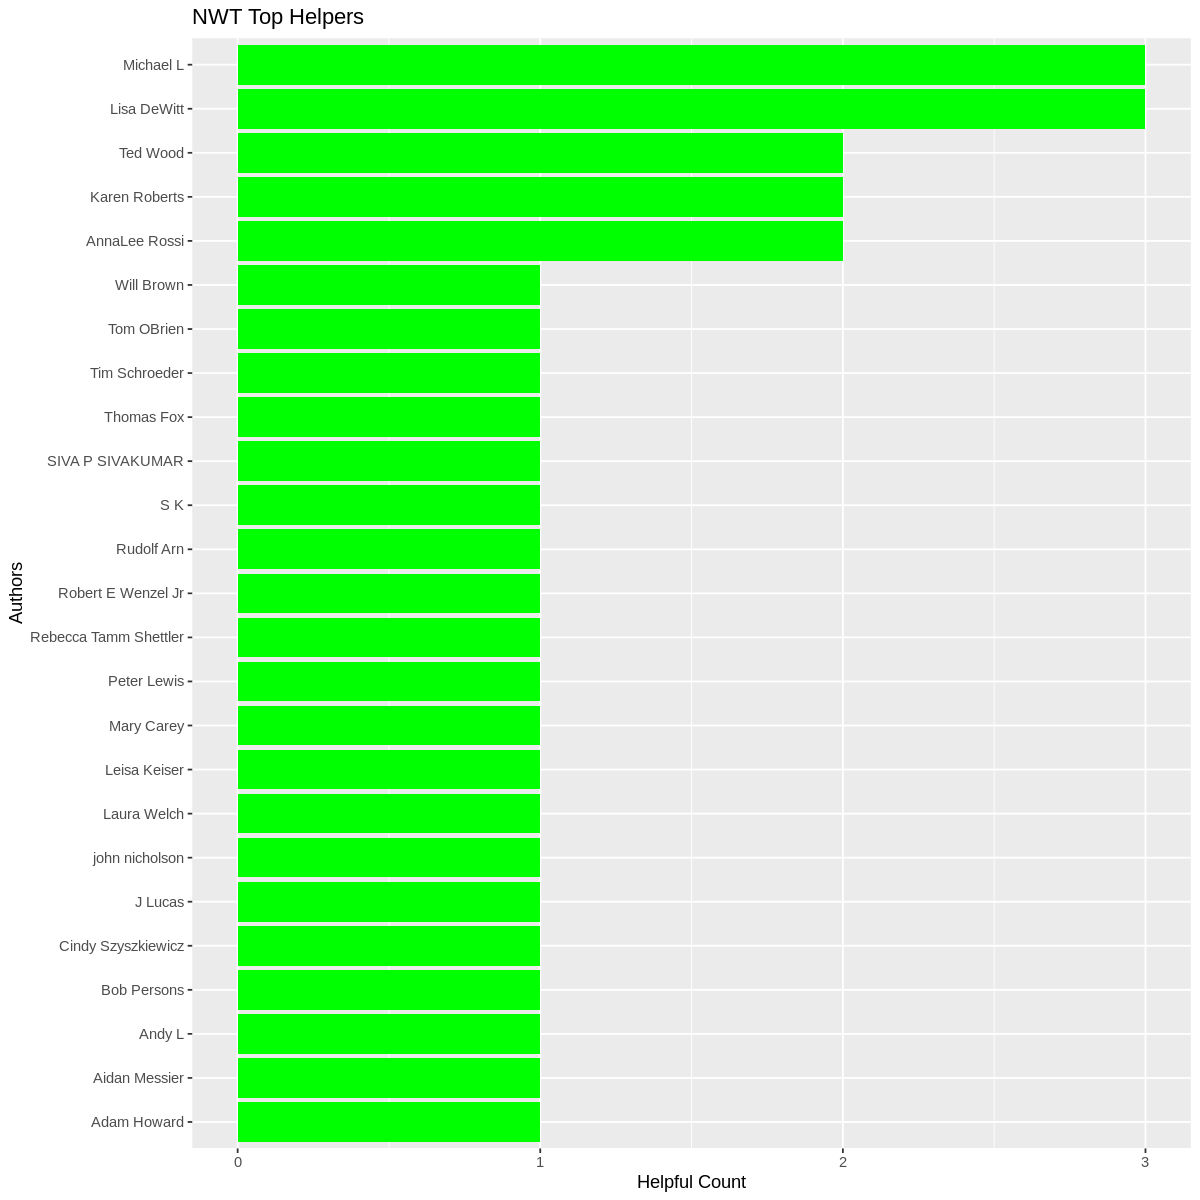

In [ ]:
ggplot(nhp_reviews_helpfullness) +
  geom_col(aes(x = reorder (Author, Helpful.count), y = Helpful.count), fill = "green") + 
  coord_flip() + 
  labs(x = "Authors", y = "Helpful Count", title = "NHP Top Helpers")
  options(repr.plot.width=10, repr.plot.height=10)
  
ggplot(nwt_reviews_helpfullness) +
  geom_col(aes(x = reorder (Author, Helpful.count), y = Helpful.count), fill = "green") + 
  coord_flip() + 
  labs(x = "Authors", y = "Helpful Count", title = "NWT Top Helpers")
  options(repr.plot.width=10, repr.plot.height=10)

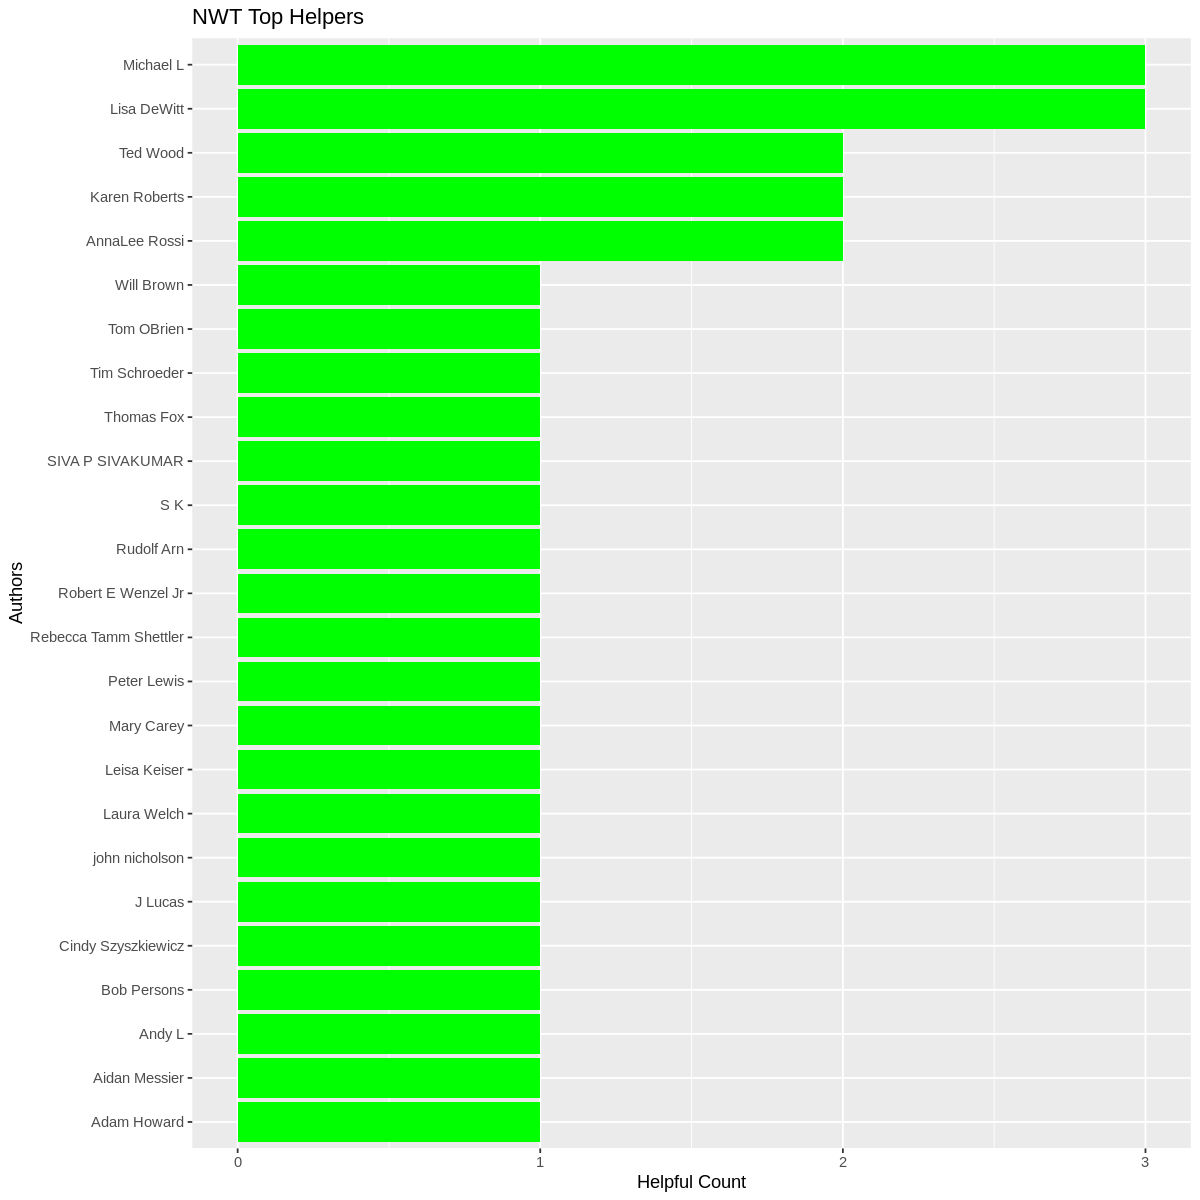

In [ ]:
ggplot(nwt_reviews_helpfullness) +
  geom_col(aes(x = reorder (Author, Helpful.count), y = Helpful.count), fill = "green") + 
  coord_flip() + 
  labs(x = "Authors", y = "Helpful Count", title = "NWT Top Helpers")
  options(repr.plot.width=10, repr.plot.height=10)

#Find temperature ranges and then graph those ranges by season

In [ ]:
railtrail_temp <- railtrail %>% 
  mutate(season = avgtemp) %>%
  select(X, hightemp,	lowtemp, avgtemp, cloudcover,	precip,	volume,	weekday, dayType, season)

railtrail_temp$season[railtrail_temp$avgtemp >= 60] <- "Summer"
railtrail_temp$season[railtrail_temp$avgtemp < 60 & railtrail_temp$avgtemp >= 40] <- "Spring"
railtrail_temp$season[railtrail_temp$avgtemp < 40] <- "Fall"

railtrail_temp

X,hightemp,lowtemp,avgtemp,cloudcover,precip,volume,weekday,dayType,season
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<chr>,<chr>
1,83,50,66.5,7.6,0.00,501,TRUE,weekday,Summer
2,73,49,61.0,6.3,0.29,419,TRUE,weekday,Summer
3,74,52,63.0,7.5,0.32,397,TRUE,weekday,Summer
4,95,61,78.0,2.6,0.00,385,FALSE,weekend,Summer
5,44,52,48.0,10.0,0.14,200,TRUE,weekday,Spring
6,69,54,61.5,6.6,0.02,375,TRUE,weekday,Summer
7,66,39,52.5,2.4,0.00,417,TRUE,weekday,Spring
8,66,38,52.0,0.0,0.00,629,FALSE,weekend,Spring
9,80,55,67.5,3.8,0.00,533,FALSE,weekend,Summer


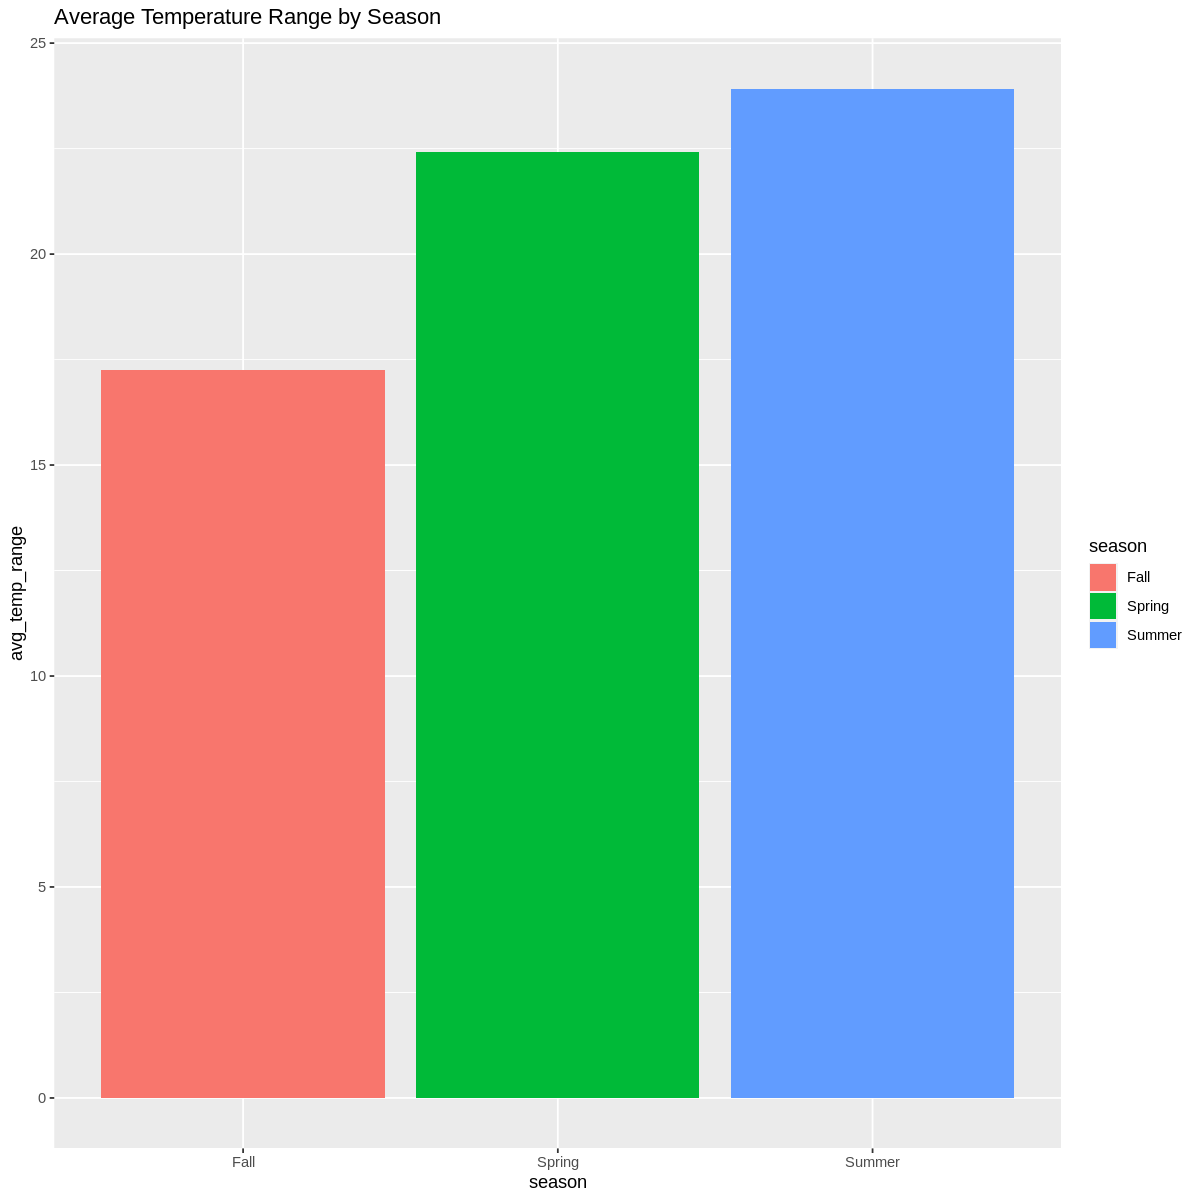

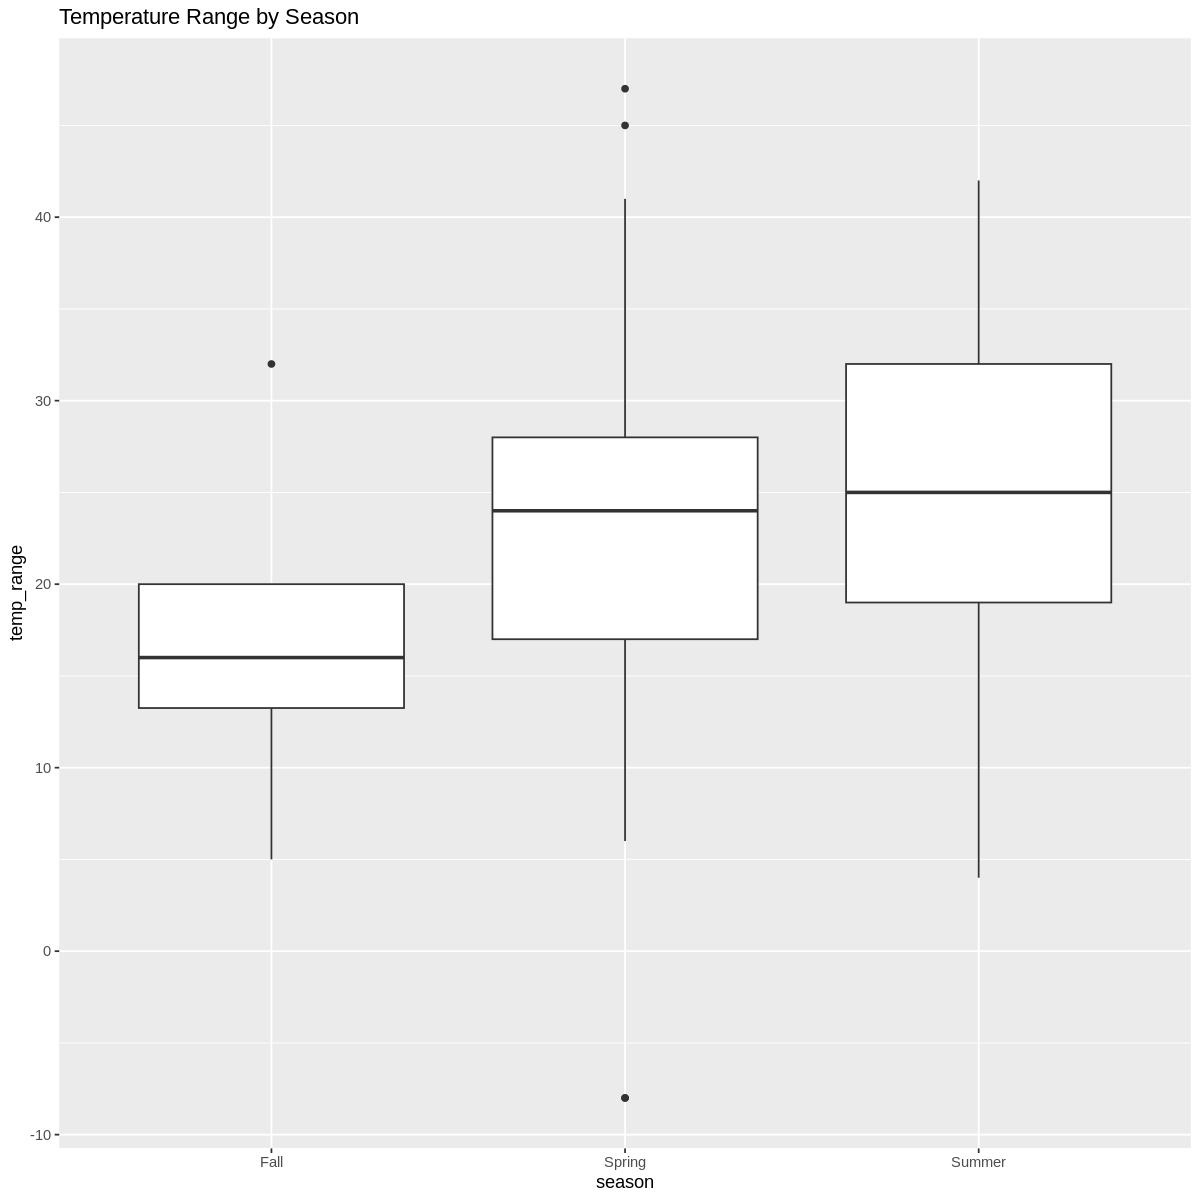

In [ ]:
railtrail_temp %>%
  mutate(temp_range = hightemp - lowtemp) %>%
  group_by(season) %>%
  summarize("avg_temp_range" = mean(temp_range)) %>%
  ggplot() +
geom_col(aes(x=season, y = avg_temp_range, fill = season)) +
labs(title = "Average Temperature Range by Season")

railtrail_temp %>%
  mutate(temp_range = hightemp - lowtemp) %>%
  #group_by(season) %>%
  #summarize("avg_temp_range" = mean(temp_range)) %>%
  ggplot() +
  geom_boxplot(aes(x=season, y=temp_range)) +
  labs(title = "Temperature Range by Season")


#Then we made double boxplots of showing weekday and weekend temperature ranges by season

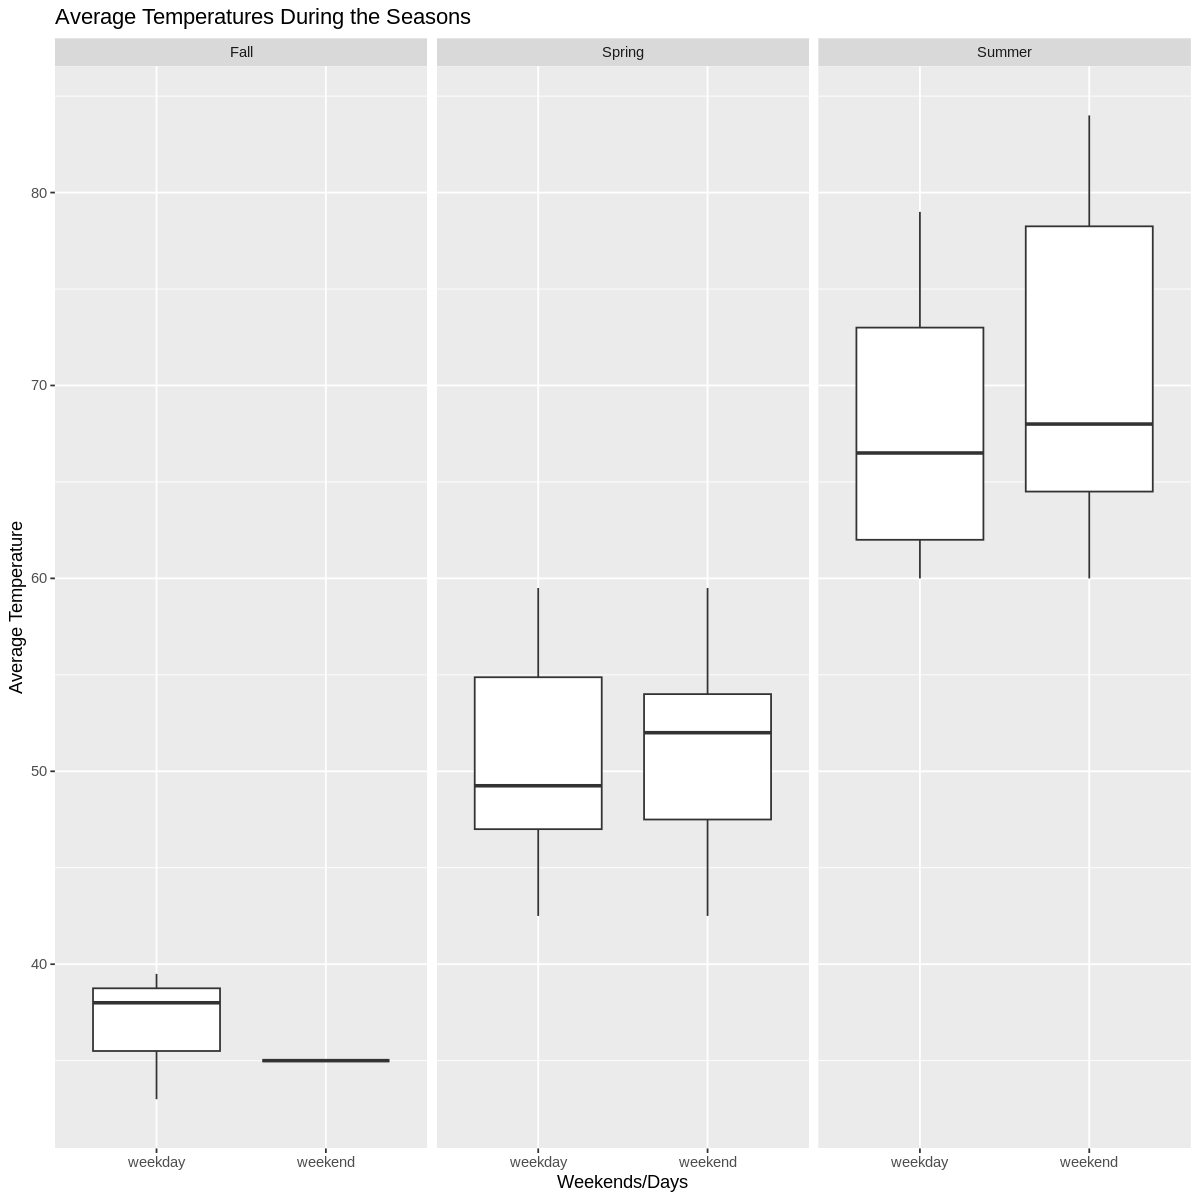

In [ ]:
ggplot(railtrail_temp) + 
  geom_boxplot(mapping = aes(x = dayType, y = avgtemp)) + 
  facet_wrap(~season) + 
  labs(y = "Average Temperature", x = "Weekends/Days", title = "Average Temperatures During the Seasons")

#Make a decision tree so we can see the most common predictor of trail volume

In [ ]:
railtrail2 <- subset(railtrail, select = -c(dayType, weekday))


Model formula:
volume ~ X + hightemp + lowtemp + avgtemp + spring + summer + 
    fall + cloudcover + precip

Fitted party:
[1] root
|   [2] hightemp <= 64
|   |   [3] hightemp <= 52: 208.600 (n = 10, err = 29778.4)
|   |   [4] hightemp > 52: 296.875 (n = 24, err = 106136.6)
|   [5] hightemp > 64
|   |   [6] cloudcover <= 6.2: 485.750 (n = 28, err = 336511.2)
|   |   [7] cloudcover > 6.2: 391.929 (n = 28, err = 198711.9)

Number of inner nodes:    3
Number of terminal nodes: 4

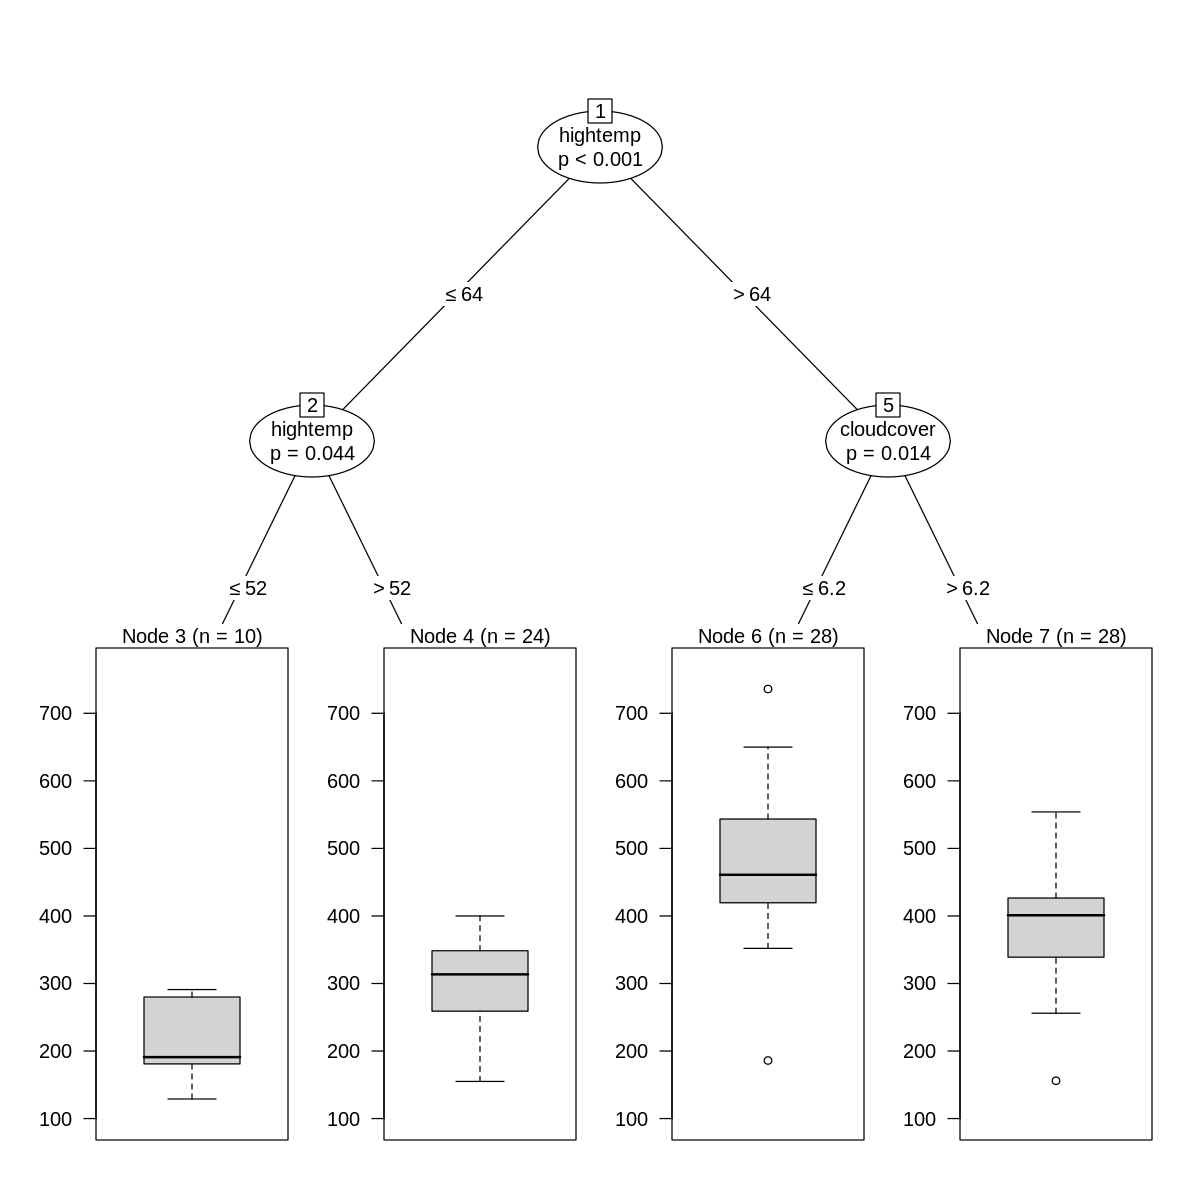

In [ ]:
#decision tree for predicting trail traffic
rtrail_tree <- ctree(volume ~ ., data =  railtrail2)
rtrail_tree
plot(rtrail_tree)

#Made some scatter plots showing precip, cloudcover and avgtemp compared to volume

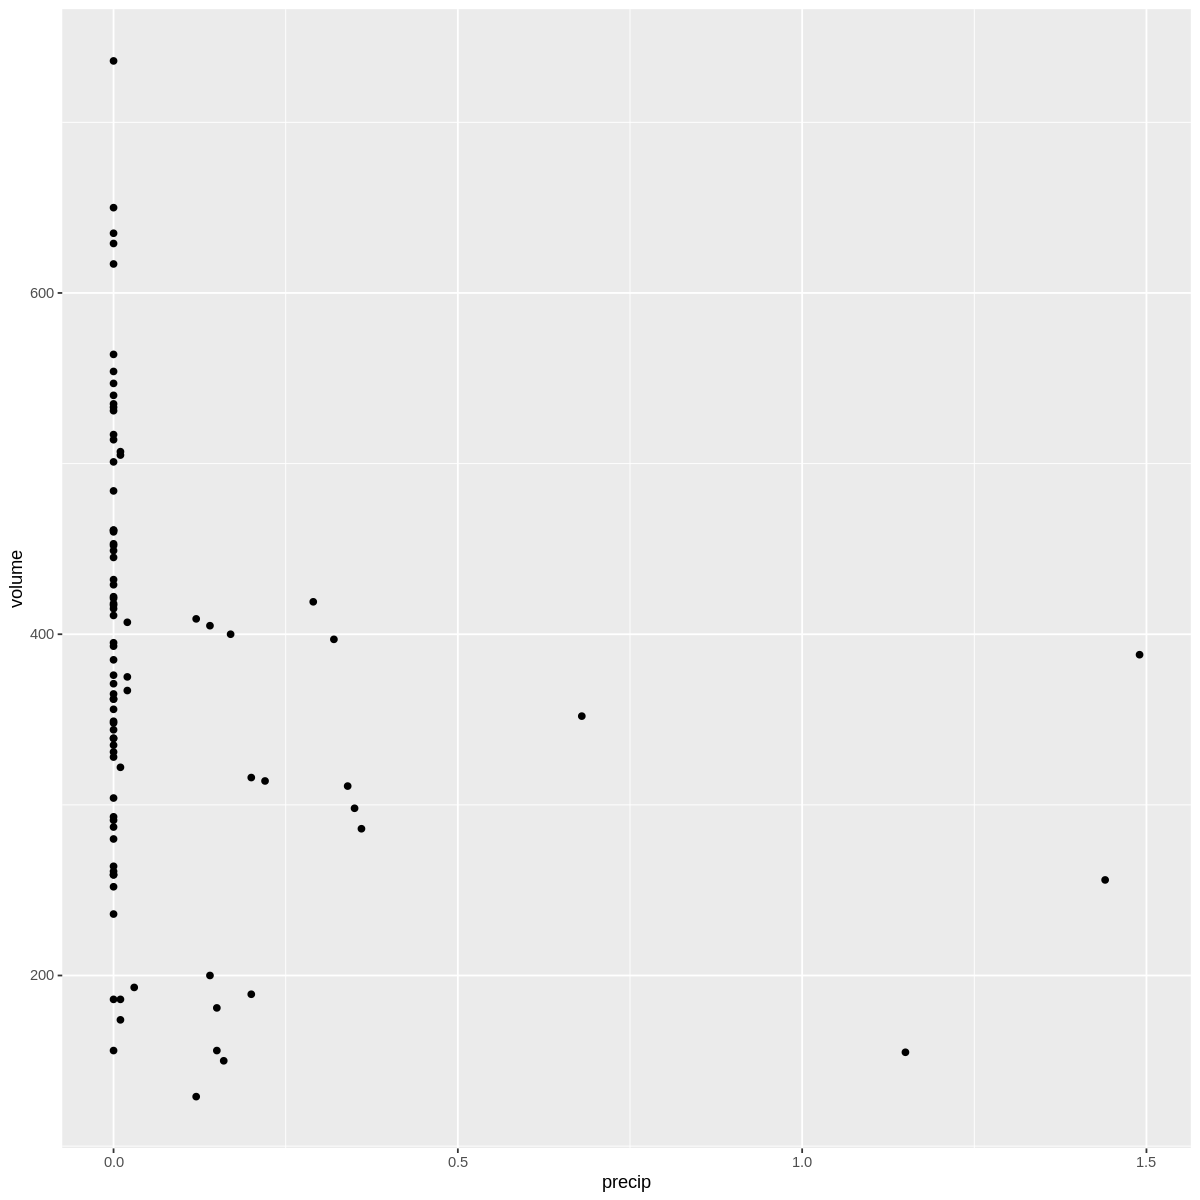

In [ ]:
railtrail %>%
ggplot() +
geom_point(mapping = aes(x = precip, y = volume))

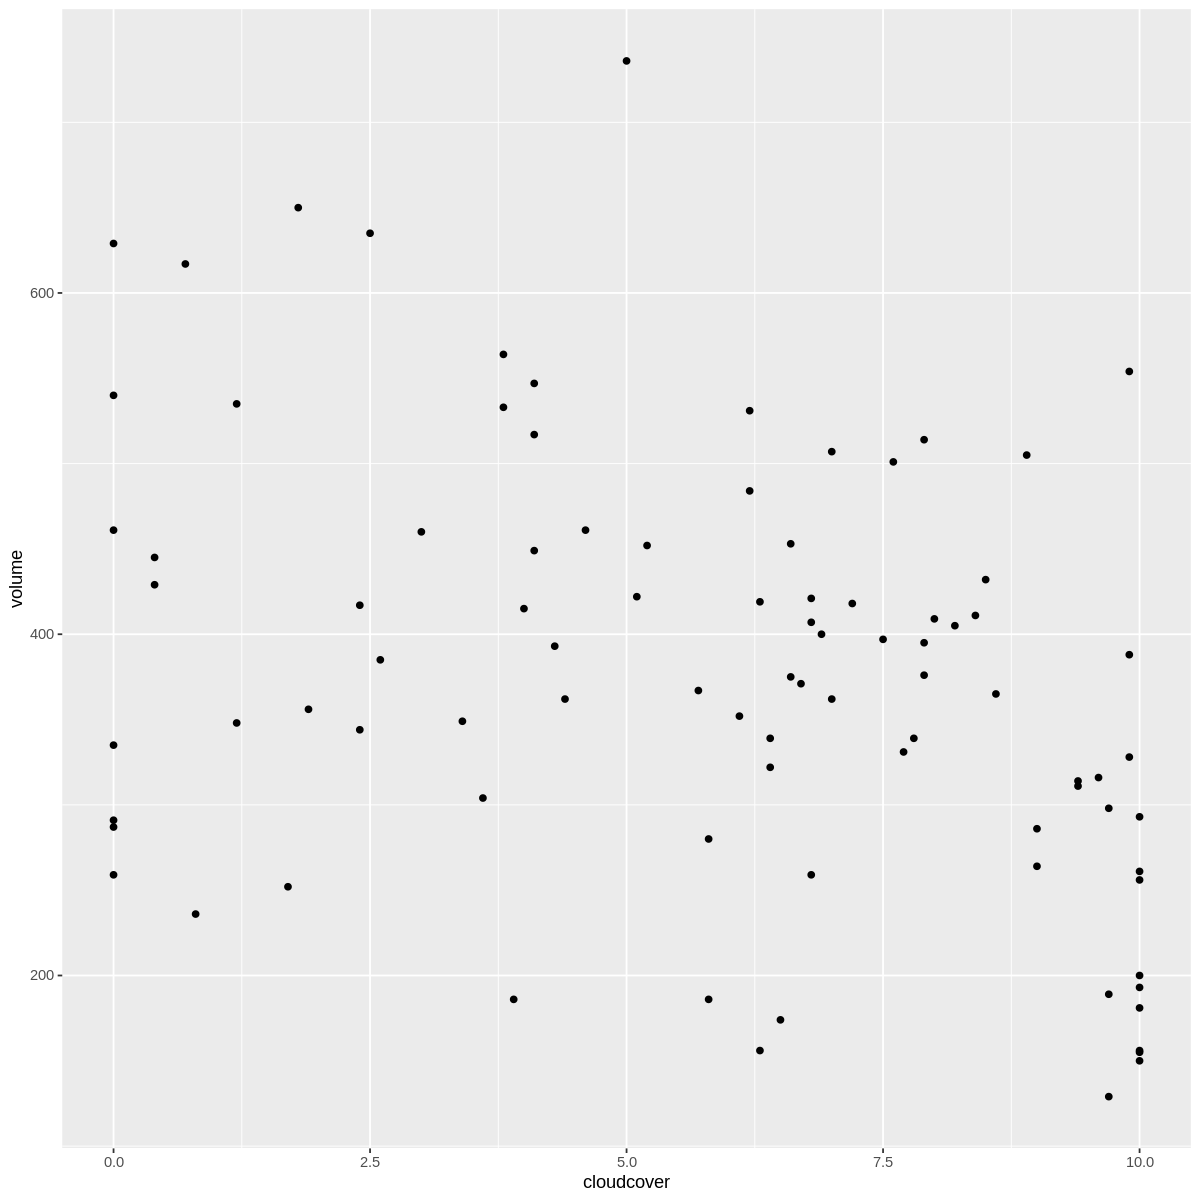

In [ ]:
railtrail %>%
ggplot() +
geom_point(mapping = aes(x = cloudcover, y = volume))

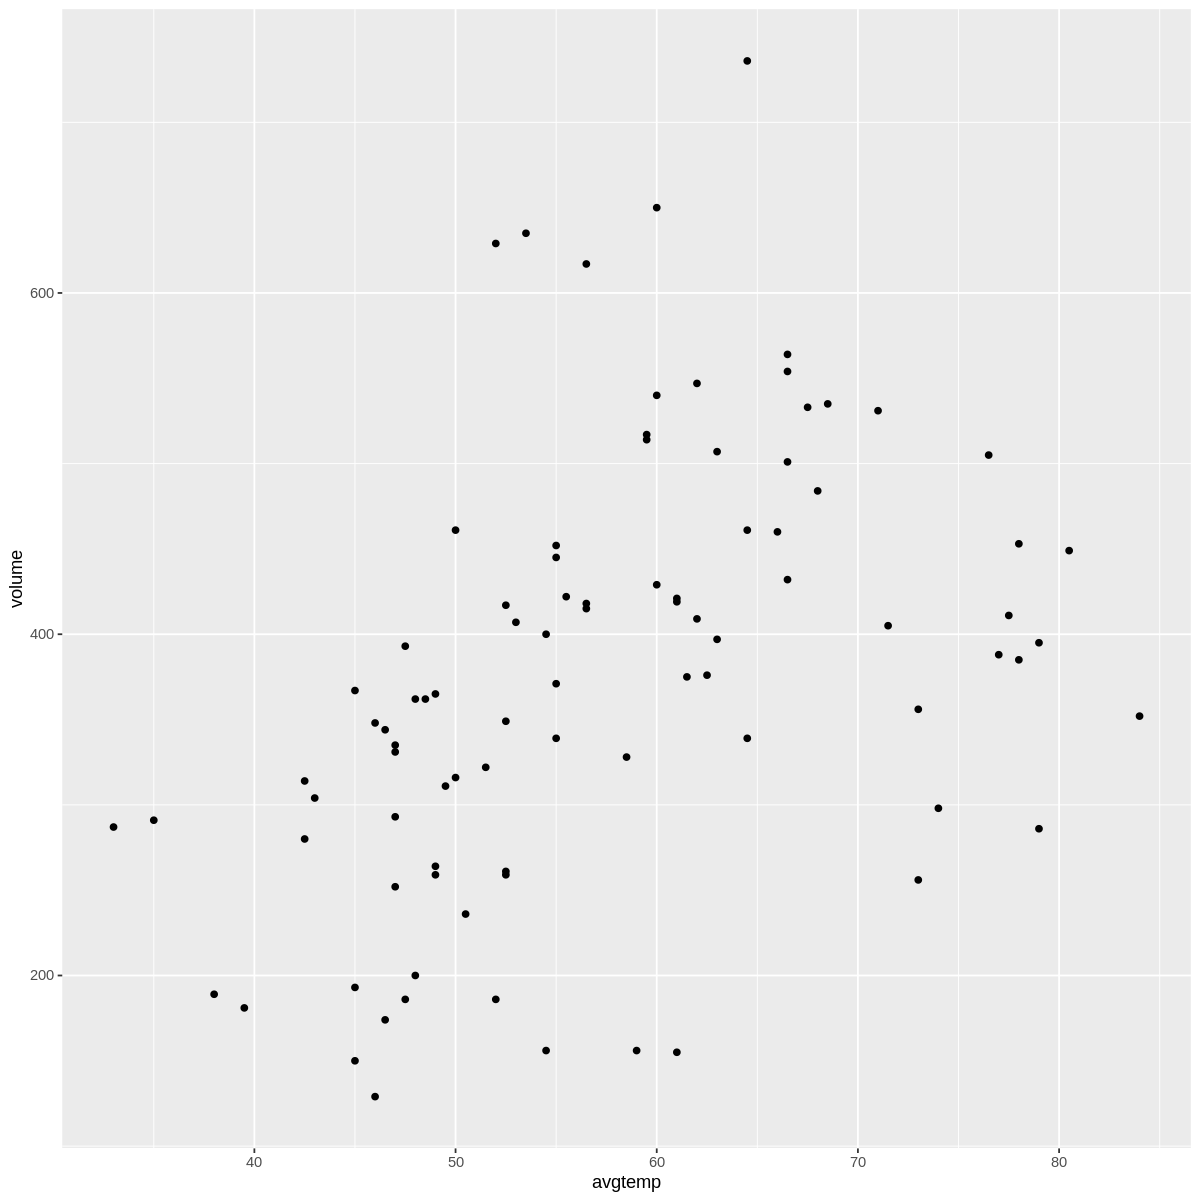

In [ ]:
railtrail %>%
ggplot() +
geom_point(mapping = aes(x =  avgtemp, y = volume))

#Showed Volume vs. Temperature by season in scatterplots and then Cloudcover vs. Temperature by season

`geom_smooth()` using formula = 'y ~ x'


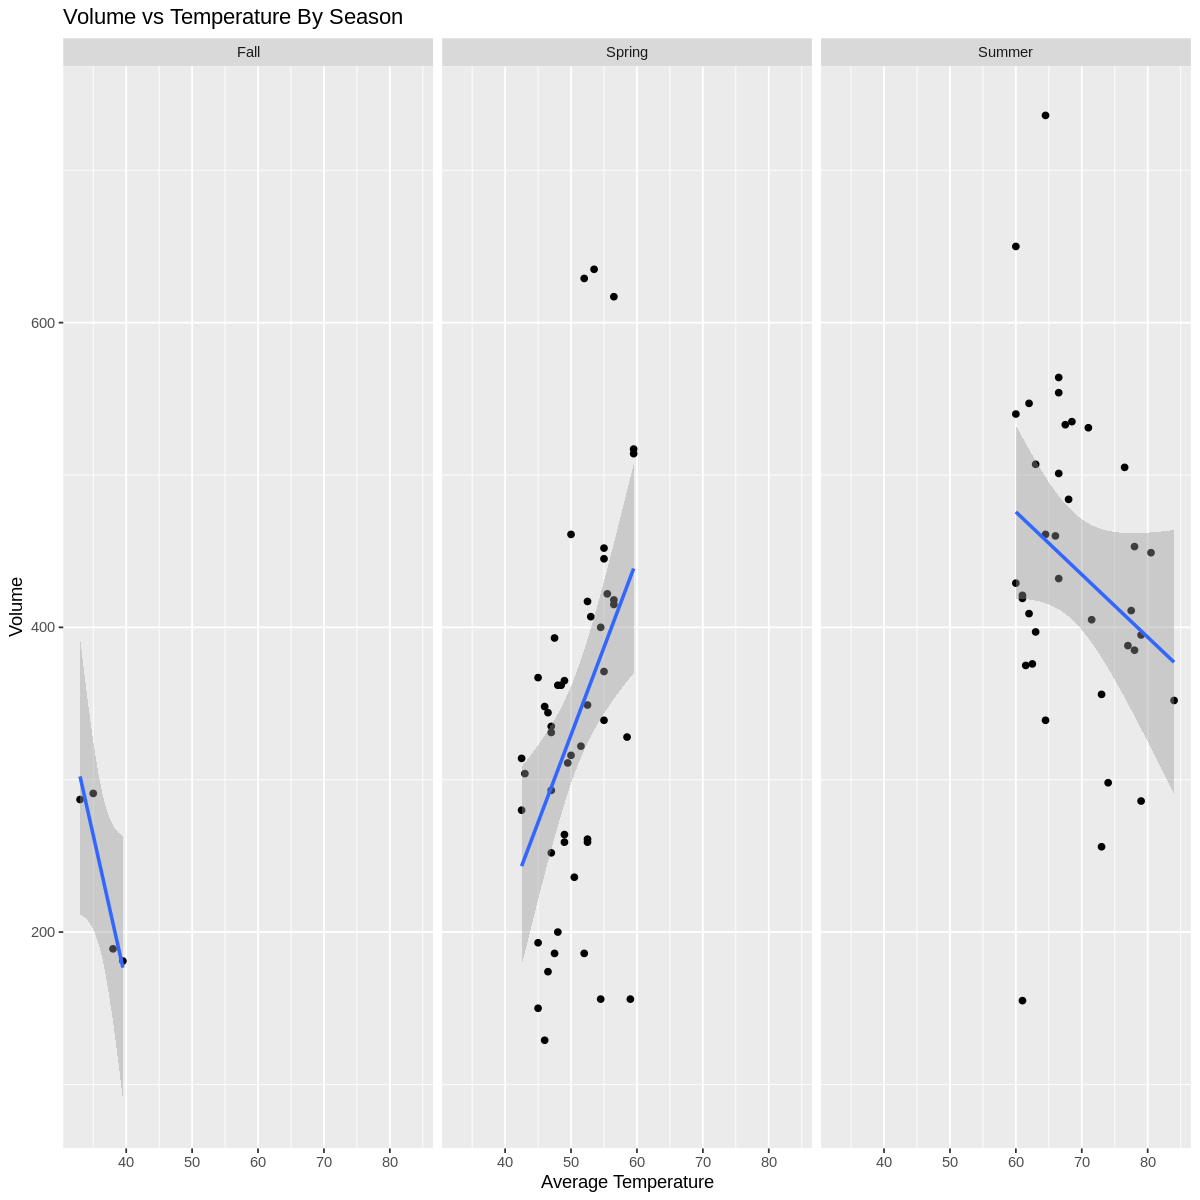

In [ ]:
ggplot(railtrail_temp) + 
  geom_point(mapping = aes(x = avgtemp, y = volume)) + 
  geom_smooth(aes(x = avgtemp, y = volume), method = 'lm') +
  facet_wrap(~season) + 
  labs(x = "Average Temperature", y = "Volume", title = "Volume vs Temperature By Season")

`geom_smooth()` using formula = 'y ~ x'


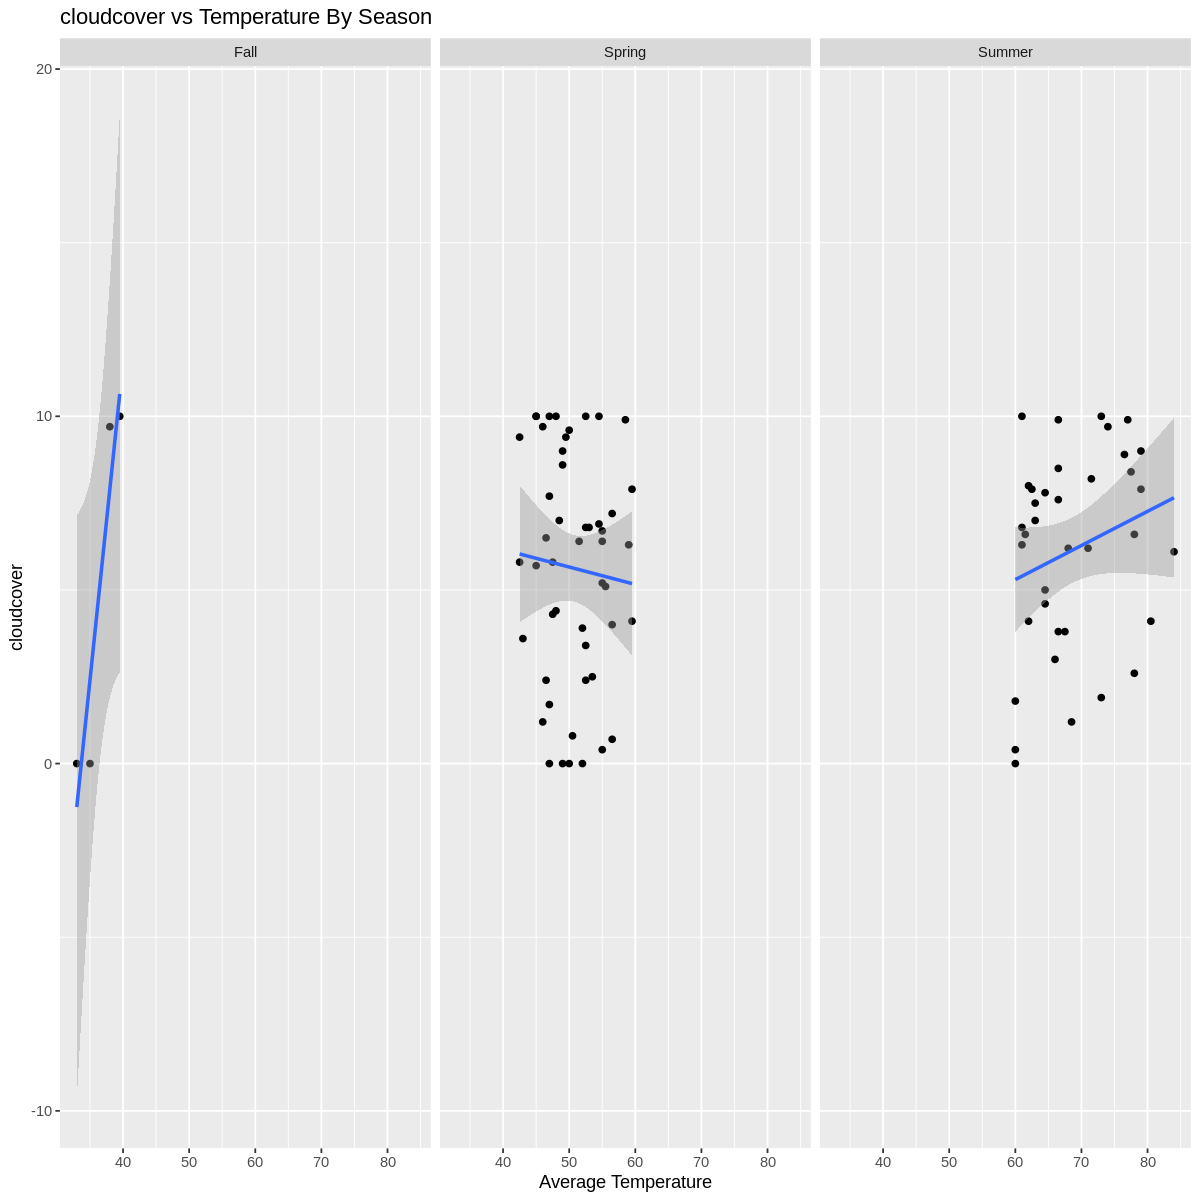

In [ ]:
ggplot(railtrail_temp) + 
  geom_point(mapping = aes(x = avgtemp, y = cloudcover)) + 
  geom_smooth(aes(x = avgtemp, y = cloudcover), method = 'lm') +
  facet_wrap(~season) + 
  labs(x = "Average Temperature", y = "cloudcover", title = "cloudcover vs Temperature By Season")

#This one doesnt show as much as the above ones

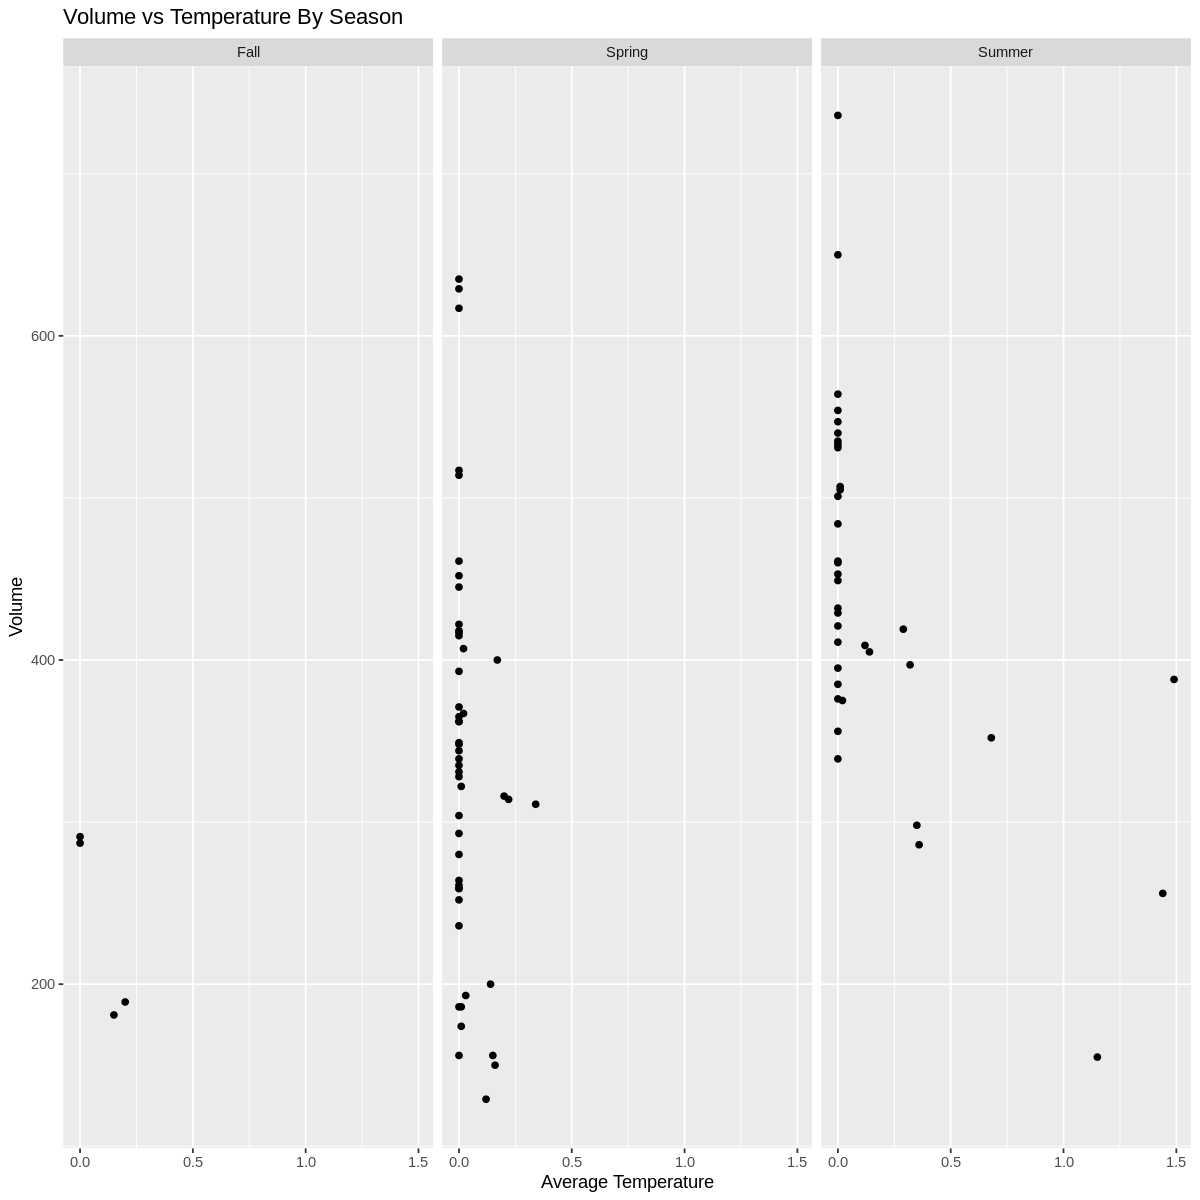

In [ ]:
ggplot(railtrail_temp) + 
  geom_point(mapping = aes(x = precip, y = volume)) + 
  facet_wrap(~season) + 
  labs(x = "Average Temperature", y = "Volume", title = "Volume vs Temperature By Season")

In [ ]:
head(railtrail)

railtrail_comp <- railtrail %>%
  select(avgtemp,spring,summer,fall,cloudcover,	precip,	volume	)
  df_new <- cbind(railtrail_comp, new)

,X,hightemp,lowtemp,avgtemp,spring,summer,fall,cloudcover,precip,volume,weekday,dayType
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<lgl>,<chr>
1,1,83,50,66.5,0,1,0,7.6,0.00,501,TRUE,weekday
2,2,73,49,61.0,0,1,0,6.3,0.29,419,TRUE,weekday
3,3,74,52,63.0,1,0,0,7.5,0.32,397,TRUE,weekday
4,4,95,61,78.0,0,1,0,2.6,0.00,385,FALSE,weekend
5,5,44,52,48.0,1,0,0,10.0,0.14,200,TRUE,weekday
6,6,69,54,61.5,1,0,0,6.6,0.02,375,TRUE,weekday


ERROR: ignored

In [ ]:
ggplot (data = railtrail) +
  geom_boxplot(mapping = aes( x = , y=avgtemp))

#Found weekend days where it rained and did not rain using DeMorgans law, then do they same for weekdays


In [ ]:

railtrail %>%
  select(X, dayType, precip)%>%
  filter(dayType == "weekend") %>%
  filter(precip != 0.00)

X,dayType,precip
<int>,<chr>,<dbl>
17,weekend,0.68
55,weekend,0.01
56,weekend,0.02
67,weekend,0.12
78,weekend,0.36
79,weekend,0.17
83,weekend,0.20
84,weekend,0.02
87,weekend,0.22


In [ ]:
railtrail %>%
  select(X, dayType, precip)%>%
  filter(dayType != "weekend") %>%
  filter(precip == 0.00)

X,dayType,precip
<int>,<chr>,<dbl>
1,weekday,0
7,weekday,0
10,weekday,0
11,weekday,0
12,weekday,0
14,weekday,0
15,weekday,0
16,weekday,0
18,weekday,0


In [ ]:

railtrail %>%
  select(X, dayType, precip)%>%
  filter(dayType == "weekday") %>%
  filter(precip != 0.00)

X,dayType,precip
<int>,<chr>,<dbl>
2,weekday,0.29
3,weekday,0.32
5,weekday,0.14
6,weekday,0.02
13,weekday,0.03
20,weekday,0.15
24,weekday,0.20
26,weekday,1.44
27,weekday,1.15


In [ ]:
railtrail %>%
  select(X, dayType, precip)%>%
  filter(dayType != "weekend") %>%
  filter(precip == 0.00)

X,dayType,precip
<int>,<chr>,<dbl>
1,weekday,0
7,weekday,0
10,weekday,0
11,weekday,0
12,weekday,0
14,weekday,0
15,weekday,0
16,weekday,0
18,weekday,0


In [ ]:
head(railtrail)
table(railtrail$dayType)


,X,hightemp,lowtemp,avgtemp,spring,summer,fall,cloudcover,precip,volume,weekday,dayType
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<lgl>,<chr>
1,1,83,50,66.5,0,1,0,7.6,0.00,501,TRUE,weekday
2,2,73,49,61.0,0,1,0,6.3,0.29,419,TRUE,weekday
3,3,74,52,63.0,1,0,0,7.5,0.32,397,TRUE,weekday
4,4,95,61,78.0,0,1,0,2.6,0.00,385,FALSE,weekend
5,5,44,52,48.0,1,0,0,10.0,0.14,200,TRUE,weekday
6,6,69,54,61.5,1,0,0,6.6,0.02,375,TRUE,weekday



weekday weekend 
     62      28 

#Best day/temperature with the most amount of volume in people 

In [ ]:

Best_day_summer <- railtrail %>% 
  filter(avgtemp >= 60.0) %>%
  select(hightemp, lowtemp, avgtemp, volume) %>%
  arrange(desc(volume))
head(Best_day_summer, 10)

Best_day_spring <- railtrail %>% 
  filter(avgtemp < 60.0 & avgtemp >= 40.0) %>%
  select(hightemp, lowtemp, avgtemp, volume) %>%
  arrange(desc(volume))
head(Best_day_spring, 10)

Best_day_fall <- railtrail %>% 
  filter(avgtemp < 40.0) %>%
  select(hightemp, lowtemp, avgtemp, volume) %>%
  arrange(desc(volume))
head(Best_day_fall, 10)

,hightemp,lowtemp,avgtemp,volume
,<int>,<int>,<dbl>,<int>
1,77,52,64.5,736
2,76,44,60.0,650
3,80,53,66.5,564
4,70,63,66.5,554
5,79,45,62.0,547
6,81,39,60.0,540
7,83,54,68.5,535
8,80,55,67.5,533
9,88,54,71.0,531


,hightemp,lowtemp,avgtemp,volume
,<int>,<int>,<dbl>,<int>
1,74,33,53.5,635
2,66,38,52.0,629
3,80,33,56.5,617
4,72,47,59.5,517
5,70,49,59.5,514
6,70,30,50.0,461
7,71,39,55.0,452
8,67,43,55.0,445
9,70,41,55.5,422


,hightemp,lowtemp,avgtemp,volume
,<int>,<int>,<dbl>,<int>
1,51,19,35.0,291
2,41,25,33.0,287
3,46,30,38.0,189
4,42,37,39.5,181


#Showing count of days for each average temp

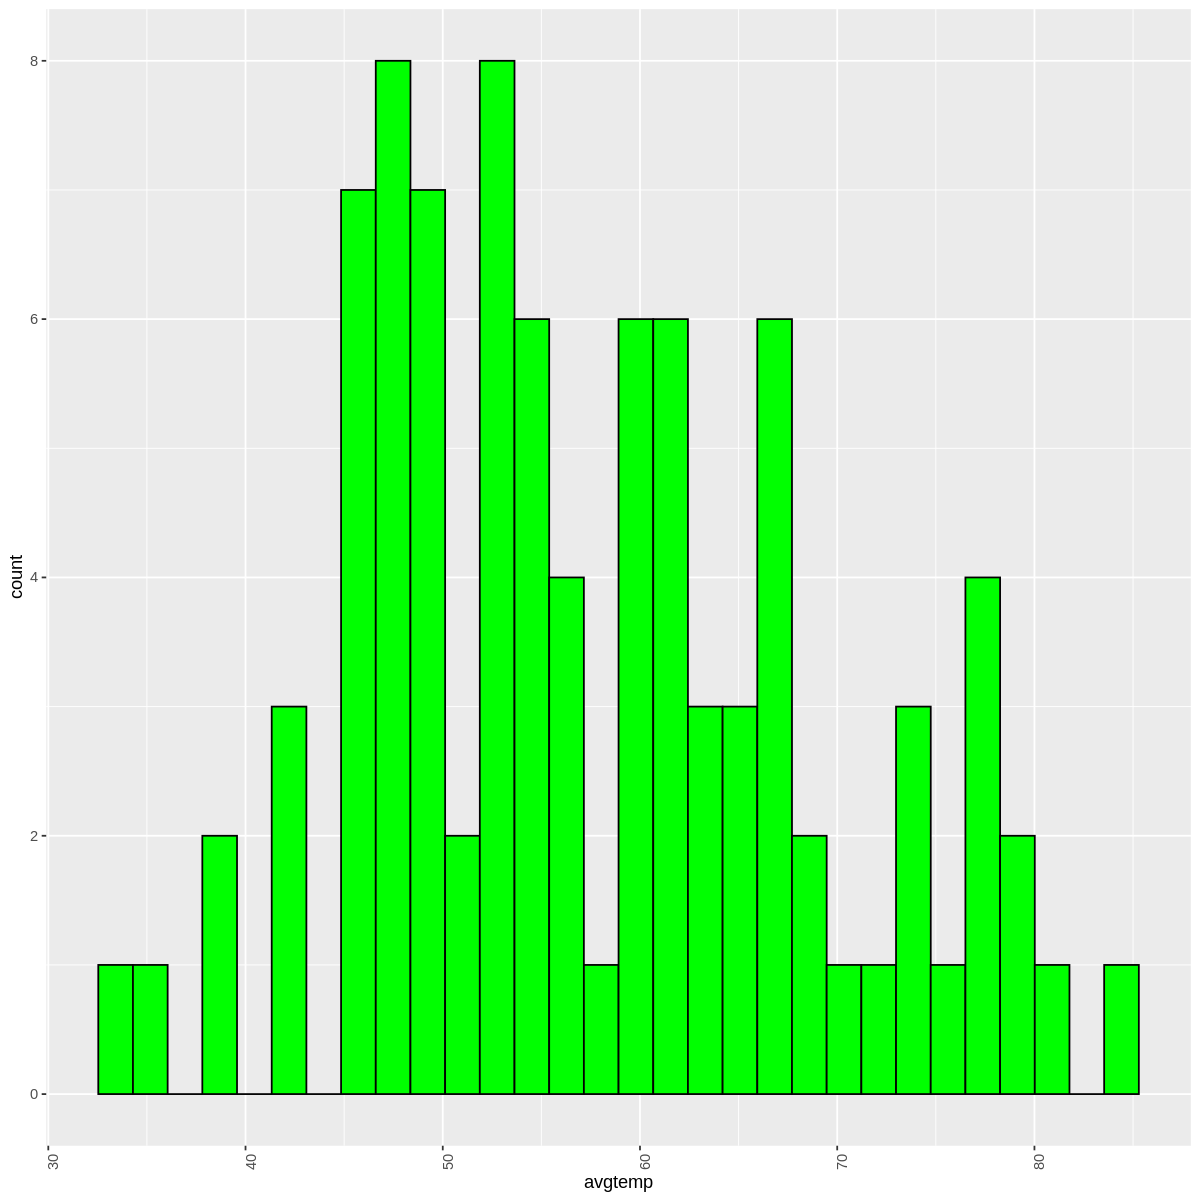

In [ ]:
railtrail %>%
ggplot() +
geom_histogram(aes(x=avgtemp), fill = "green", color = "black", bins=30) +
theme(axis.text.x = element_text(angle=90)) 


#Showing count of days for each average temp for each season seperately, then counting the proportions of weekdays to weekends

,X,hightemp,lowtemp,avgtemp,spring,summer,fall,cloudcover,precip,volume,weekday,dayType
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<lgl>,<chr>
1,1,83,50,66.5,0,1,0,7.6,0.00,501,TRUE,weekday
2,2,73,49,61.0,0,1,0,6.3,0.29,419,TRUE,weekday
3,3,74,52,63.0,1,0,0,7.5,0.32,397,TRUE,weekday
4,4,95,61,78.0,0,1,0,2.6,0.00,385,FALSE,weekend
5,5,44,52,48.0,1,0,0,10.0,0.14,200,TRUE,weekday
6,6,69,54,61.5,1,0,0,6.6,0.02,375,TRUE,weekday


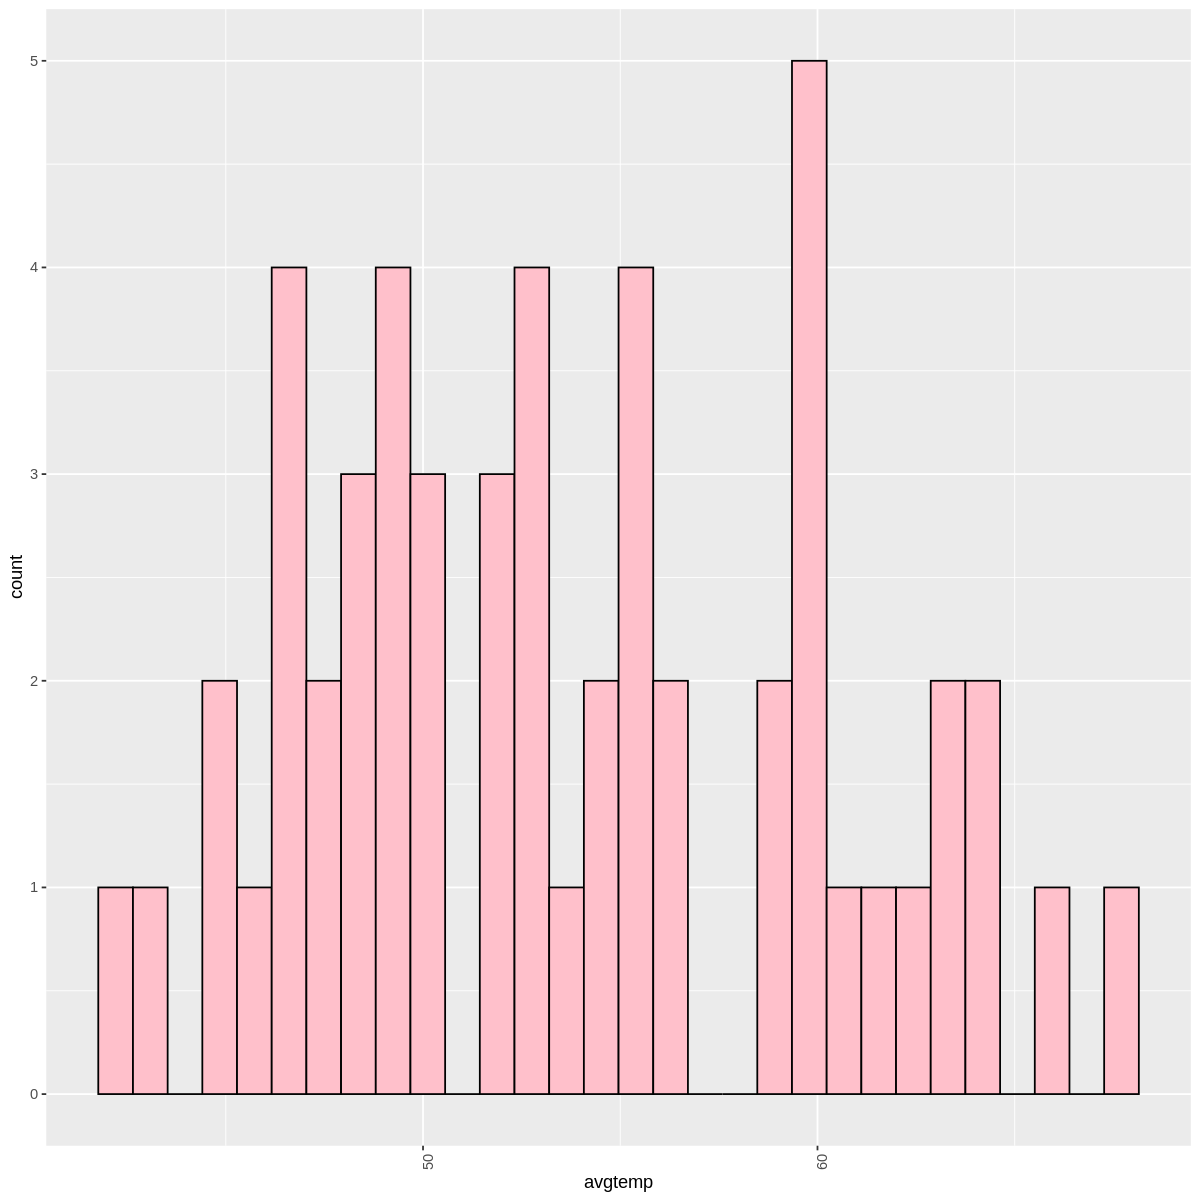

In [ ]:
head(railtrail)

railtrail_spring <- railtrail %>%
  filter(spring == 1) %>%
  select(avgtemp, spring, X, volume, dayType)


railtrail_spring %>%
ggplot() +
geom_histogram(aes(x=avgtemp), fill = "pink", color = "black", bins=30) +
theme(axis.text.x = element_text(angle=90)) 

In [ ]:
railtrail_spring %>%
  group_by(dayType) %>%
  summarize(spring = sum(n())) %>%
  select(dayType, spring)

dayType,spring
<chr>,<int>
weekday,38
weekend,15


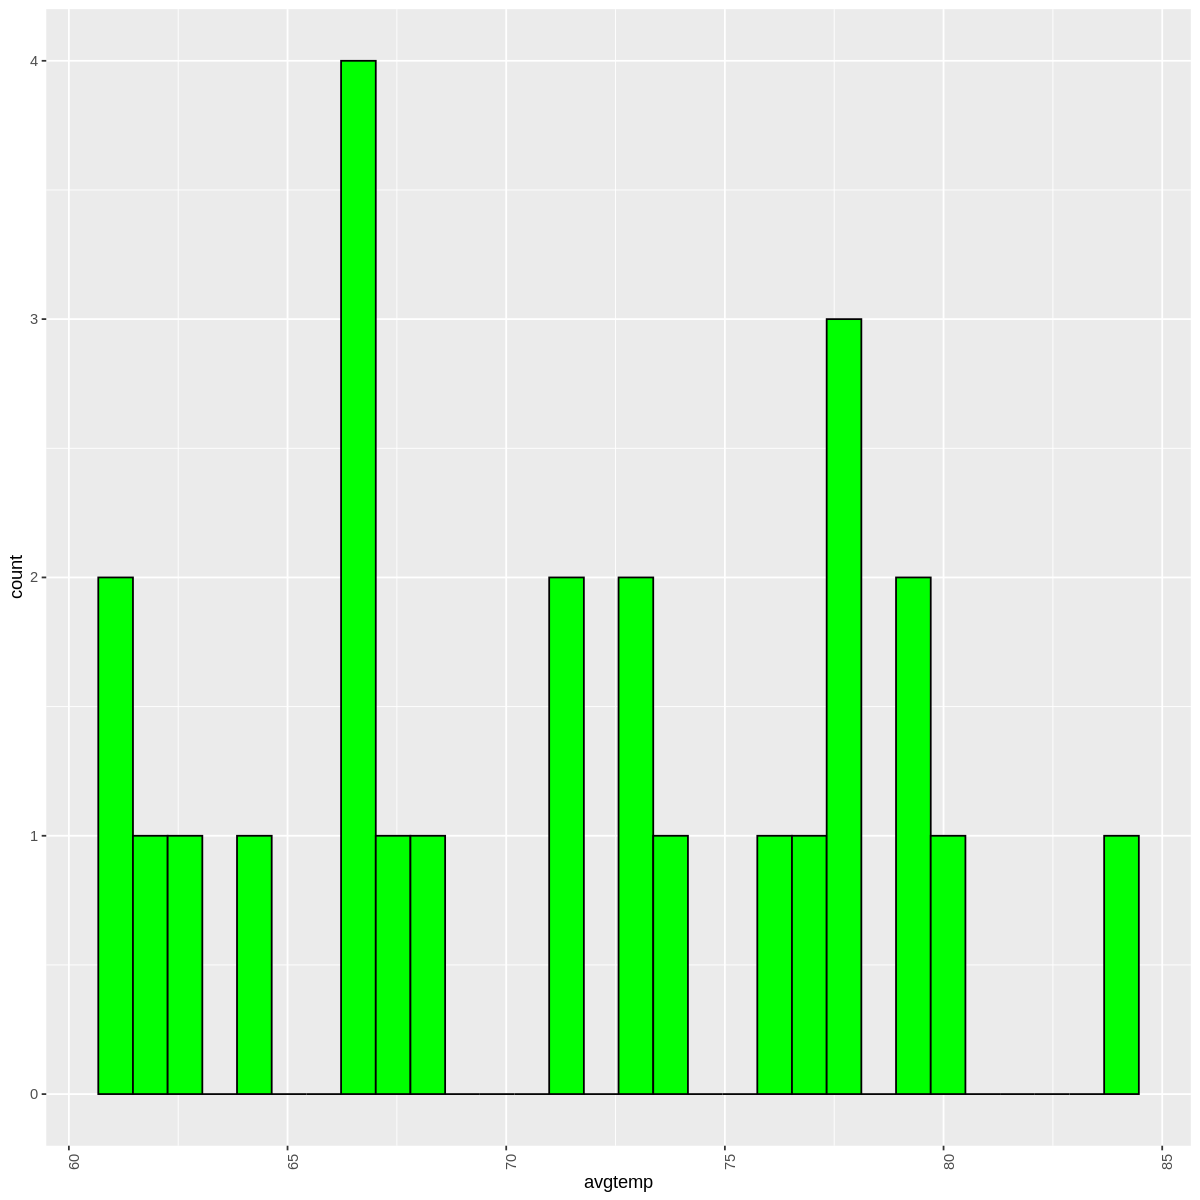

In [ ]:
railtrail_summer <- railtrail %>%
  filter(summer == 1) %>%
  select(avgtemp, spring, X, volume, dayType)


railtrail_summer %>%
ggplot() +
geom_histogram(aes(x=avgtemp), fill = "green", color = "black", bins=30) +
theme(axis.text.x = element_text(angle=90)) 

In [ ]:
railtrail_summer %>%
  group_by(dayType) %>%
  summarize(summer = sum(n())) %>%
  select(dayType, summer)

dayType,summer
<chr>,<int>
weekday,17
weekend,8


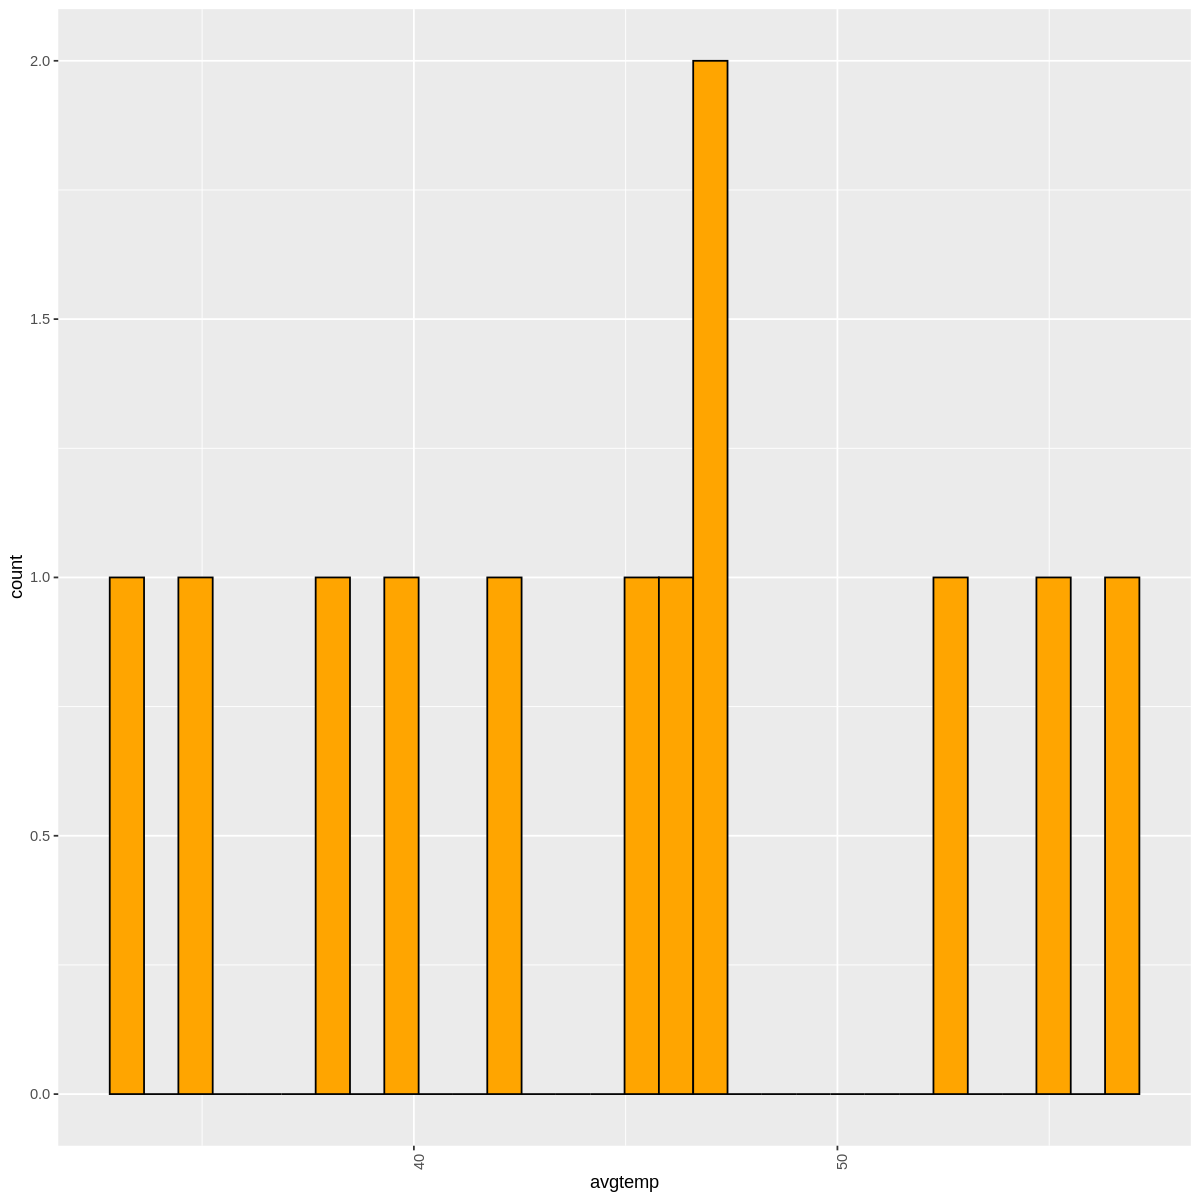

In [ ]:
railtrail_fall <- railtrail %>%
  filter(fall == 1) %>%
  select(avgtemp, spring, X, volume, dayType)


railtrail_fall %>%
ggplot() +
geom_histogram(aes(x=avgtemp), fill = "orange", color = "black", bins=30) +
theme(axis.text.x = element_text(angle=90)) 

In [ ]:
railtrail_fall %>%
  group_by(dayType) %>%
  summarize(fall = sum(n())) %>%
  select(dayType, fall)

dayType,fall
<chr>,<int>
weekday,7
weekend,5


#Simple pie chart for comparison of weekday vs. weekend volume

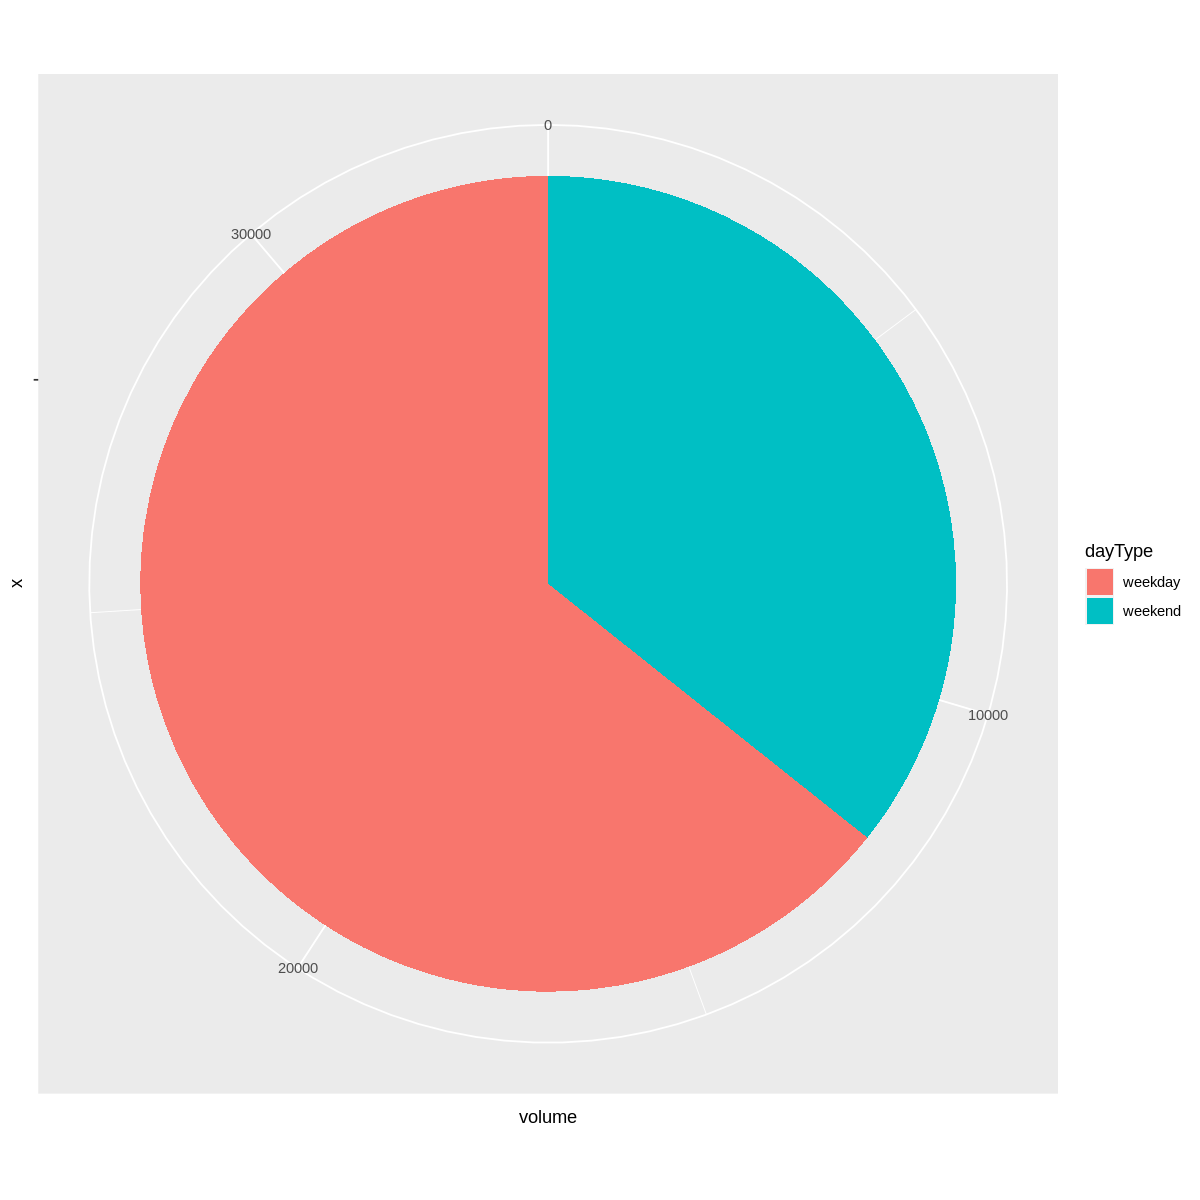

In [ ]:

ggplot(railtrail, aes(x="", y=volume, fill=dayType)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)



#Making a kmeans comparison that doesnt tell us much

,avgtemp,hightemp,lowtemp,spring,summer,fall,cloudcover,precip,volume
1,50.34615,57.73077,42.96154,0.5769231,0.1538462,0.2692308,6.857692,0.164230771,226.1923
2,59.09783,71.43478,46.76087,0.6086957,0.2826087,0.1086957,5.730435,0.087826087,387.0870
3,63.41667,78.22222,48.61111,0.5555556,0.4444444,0.0000000,4.483333,0.001111111,561.0556


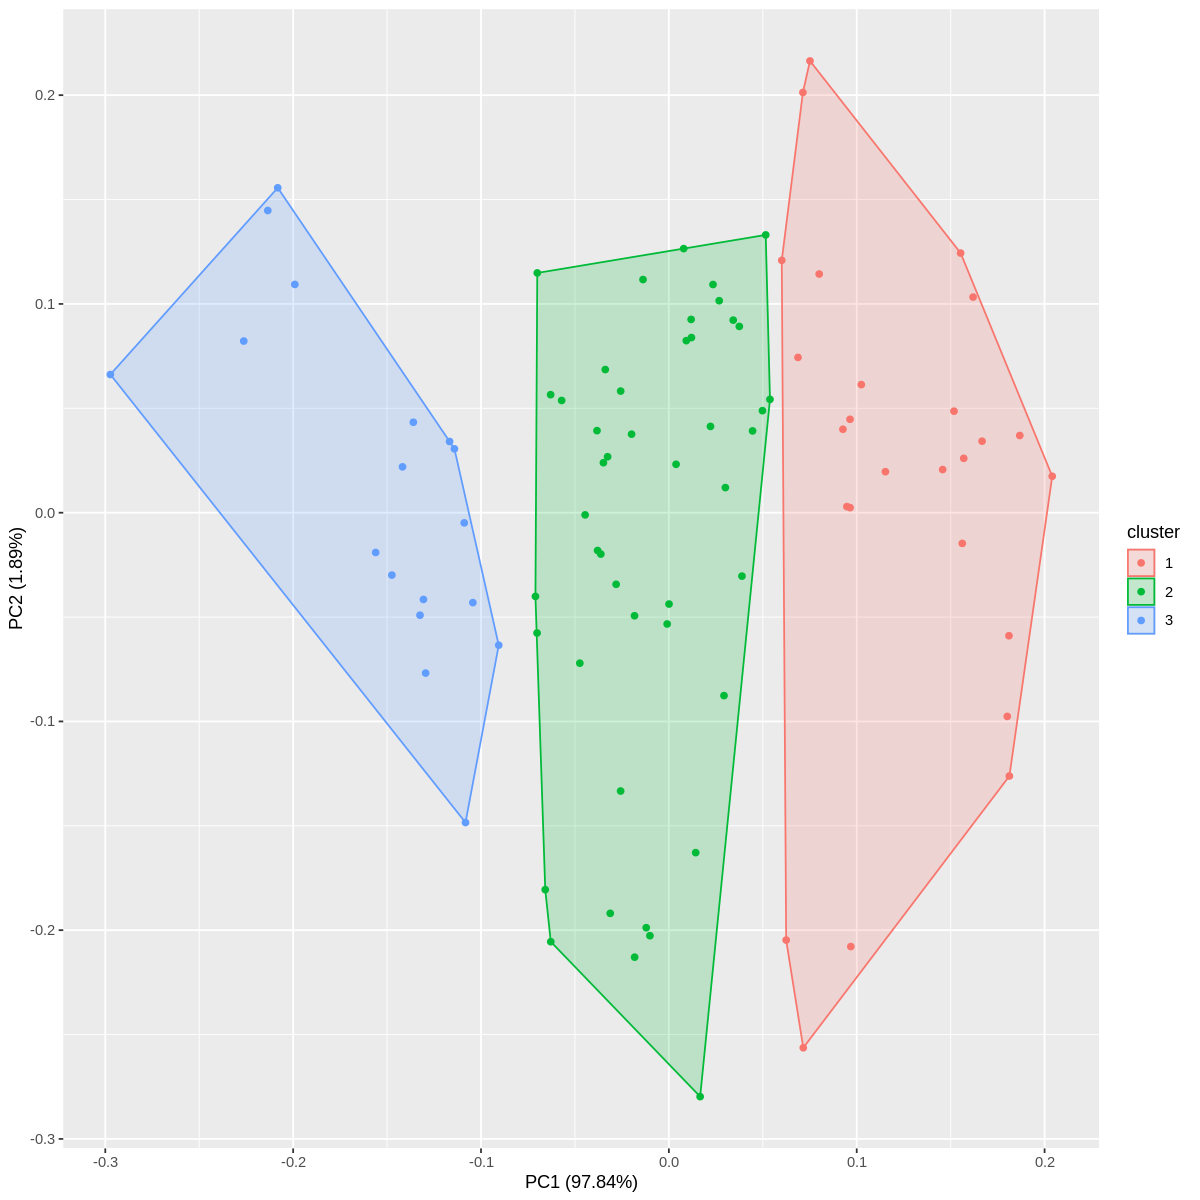

In [ ]:

d <- railtrail %>%
  select(avgtemp,hightemp,lowtemp,spring,summer,fall,cloudcover	,precip,	volume)

kmean <- kmeans(d, 3)
kmean$centers

autoplot(kmean, d, frame=TRUE)

#Checking for correlation

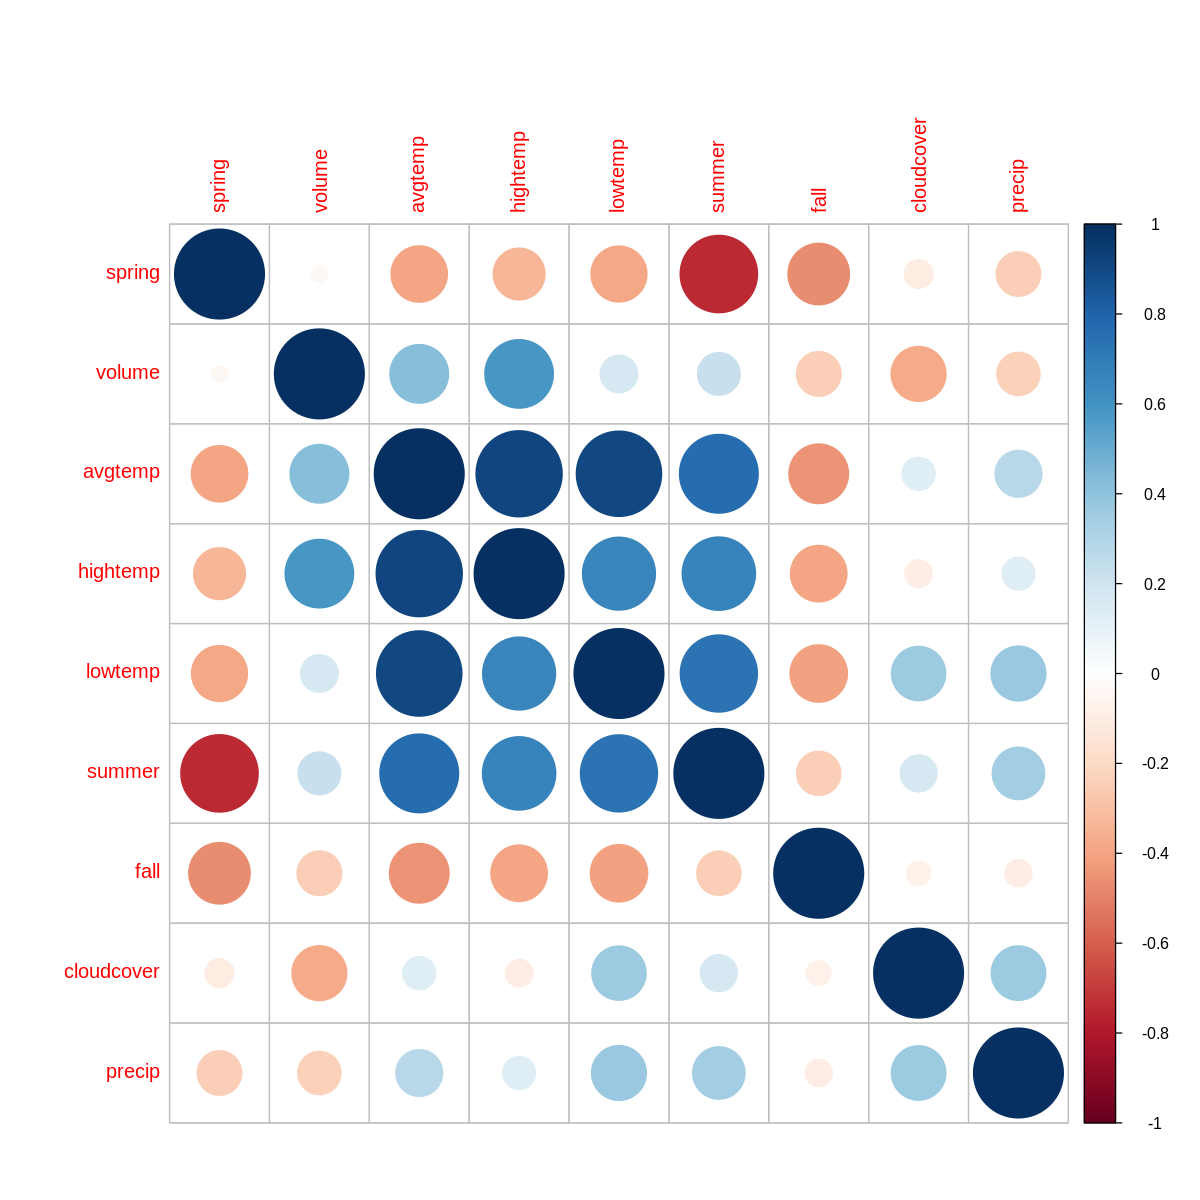

In [ ]:
corr <- railtrail %>%
  select(avgtemp,hightemp,lowtemp,spring,summer,fall,cloudcover	,precip,	volume)
corrplot(cor(corr), order = "hclust")

#Carrying out PCA

In [ ]:
corr.pca<-prcomp(corr,scale=TRUE)
corr.pca

Standard deviations (1, .., p=9):
[1] 2.019071e+00 1.380429e+00 1.213928e+00 7.915905e-01 6.620268e-01
[6] 5.505816e-01 4.196566e-01 1.725643e-16 7.262430e-17

Rotation (n x k) = (9 x 9):
                   PC1         PC2         PC3         PC4          PC5
avgtemp    -0.48001265  0.08903434 -0.04486042  0.06640724 -0.006001561
hightemp   -0.43127252  0.25371497  0.06896516 -0.05366028  0.064418018
lowtemp    -0.44413191 -0.10862150 -0.16164638  0.18603992 -0.082306916
spring      0.26008878  0.32988534 -0.58226091 -0.05946797  0.073284792
summer     -0.43956132 -0.13321236  0.17201853  0.02347172 -0.320889541
fall        0.20270973 -0.30196687  0.61613400  0.05514967  0.316733682
cloudcover -0.09693825 -0.48656582 -0.37416983  0.53831152  0.487814987
precip     -0.18752082 -0.42400908 -0.21031177 -0.81262375  0.282243445
volume     -0.19956472  0.53067797  0.18608722 -0.02888442  0.680260292
                   PC6         PC7           PC8           PC9
avgtemp     0.36223948  0.018

# Identifing and Interpreting the Dimensions/PCs

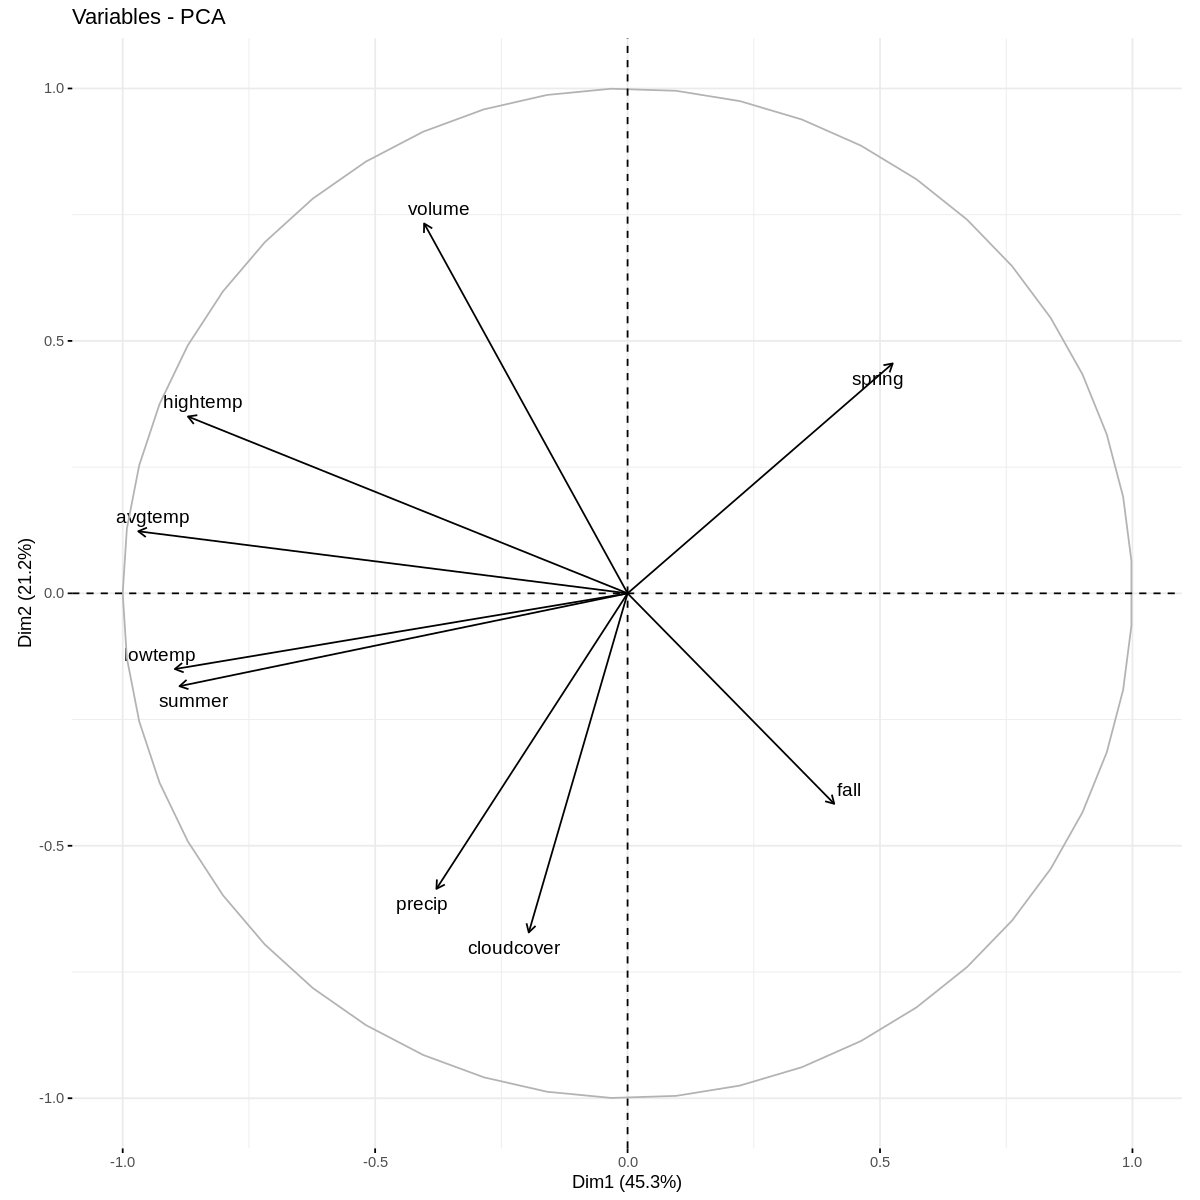

In [ ]:
fviz_pca_var(corr.pca,repel=TRUE)

#Finding which variables are well represented in each dimension




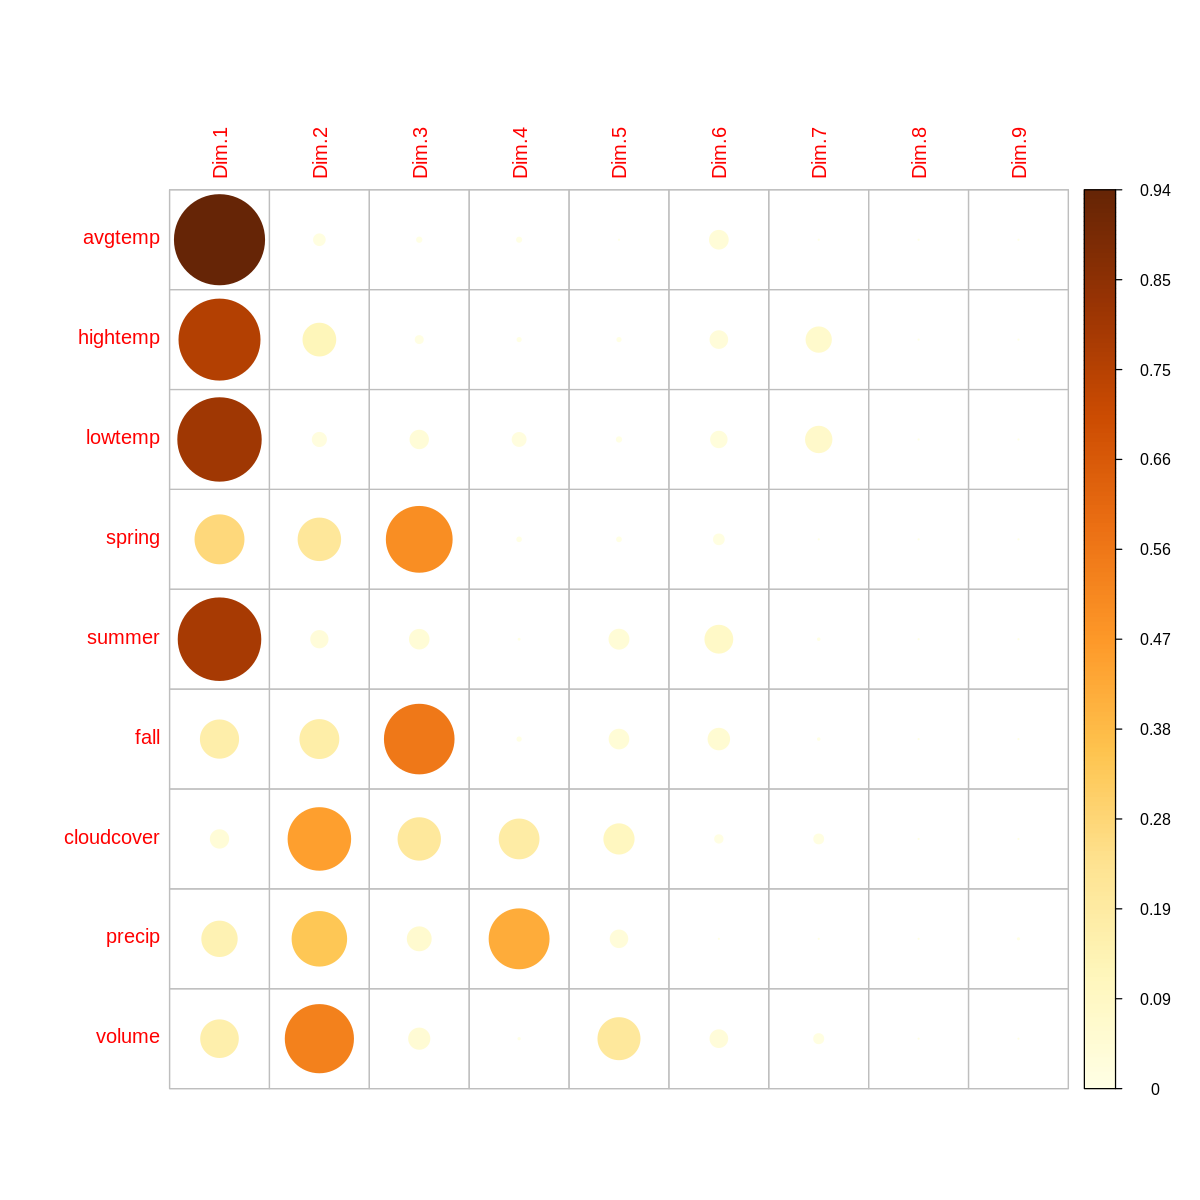

In [ ]:
corr.var <- get_pca_var(corr.pca)
corrplot(corr.var$cos2, is.corr=FALSE)

#Visualize the percentages of variance explained by each principal component (Screeplot)

In [ ]:
corr.pca <- prcomp(corr, scale=TRUE)

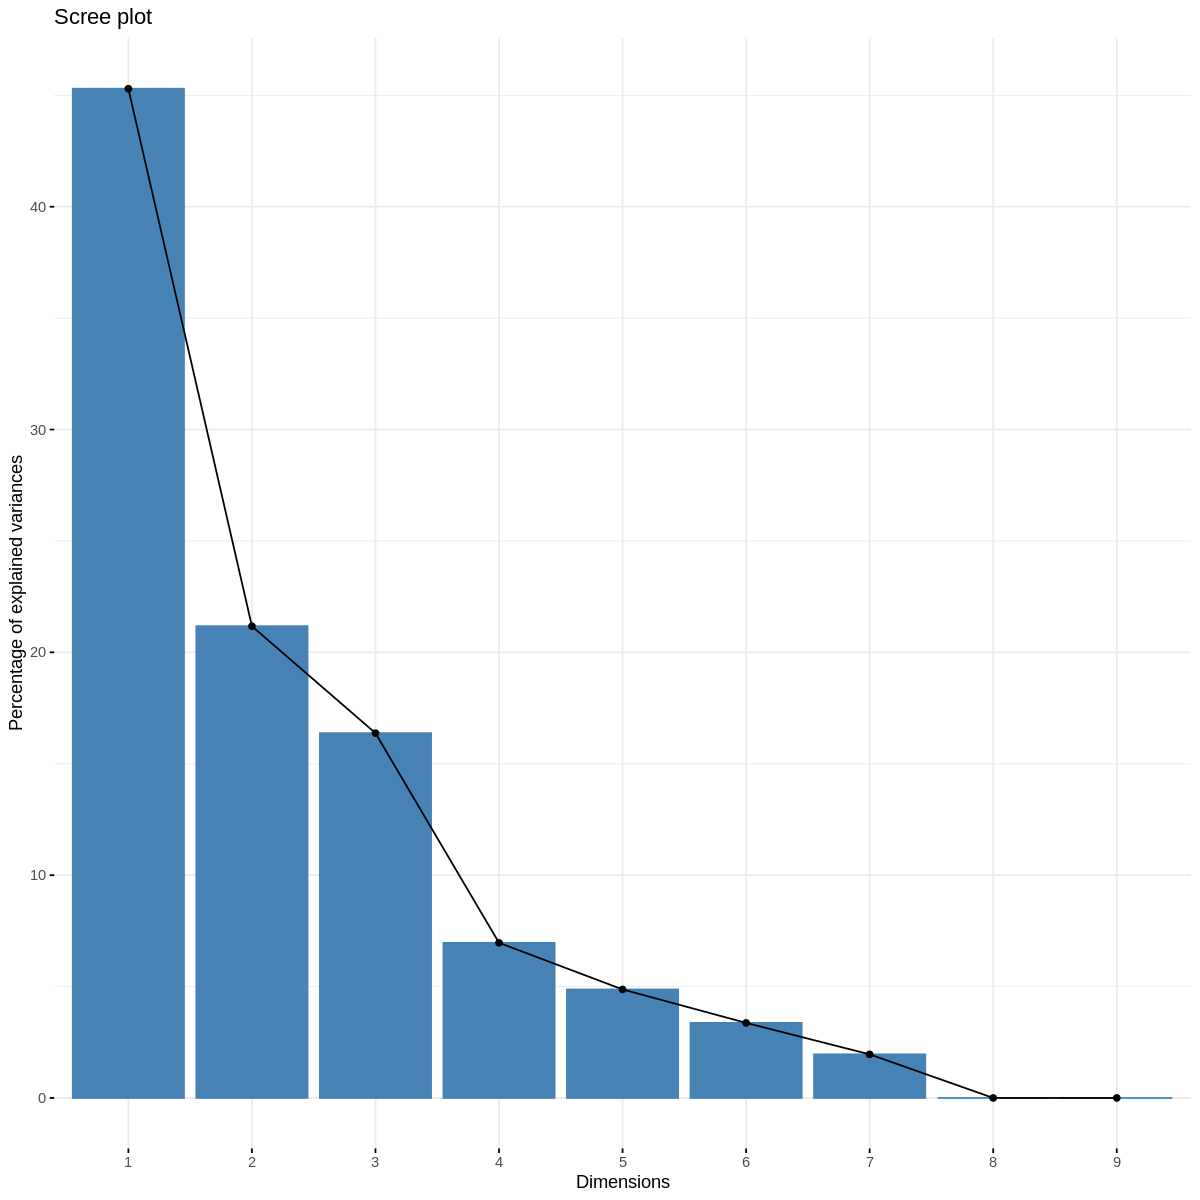

In [ ]:
fviz_eig(corr.pca)

#Results for individual days

In [ ]:
head(corr.pca$x)
corr.pca$x <- -1*corr.pca$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-2.27999284,0.22407077,0.7628719,0.70059594,0.1545735,-0.9261495,0.52560707,2.581404e-16,3.330669e-16
-1.71758151,-0.61752743,0.5445620,-0.40019406,-0.2080962,-1.1238400,0.11448971,-1.938190e-16,2.775558e-16
-0.46934654,0.03172203,-1.2529577,-0.40523886,0.7316933,0.6595605,-0.03304135,-1.260736e-16,-8.326673e-17
-3.24520292,0.71841855,1.0412629,0.08339731,-1.2436408,0.6083966,0.36082248,-5.889050e-16,3.330669e-16
1.52124518,-1.57771449,-1.7860751,0.64818044,-0.2752556,-0.1898666,-0.94648039,1.174763e-15,-8.326673e-17
-0.03989579,0.43180678,-0.9887207,0.41943693,0.1185338,0.6551402,-0.39485509,3.806928e-16,-5.551115e-17


In [ ]:
railtrail1<-cbind(railtrail, corr.pca$x) #binds the pca data to the

#Plotting PC2 against PC1, labeling by days


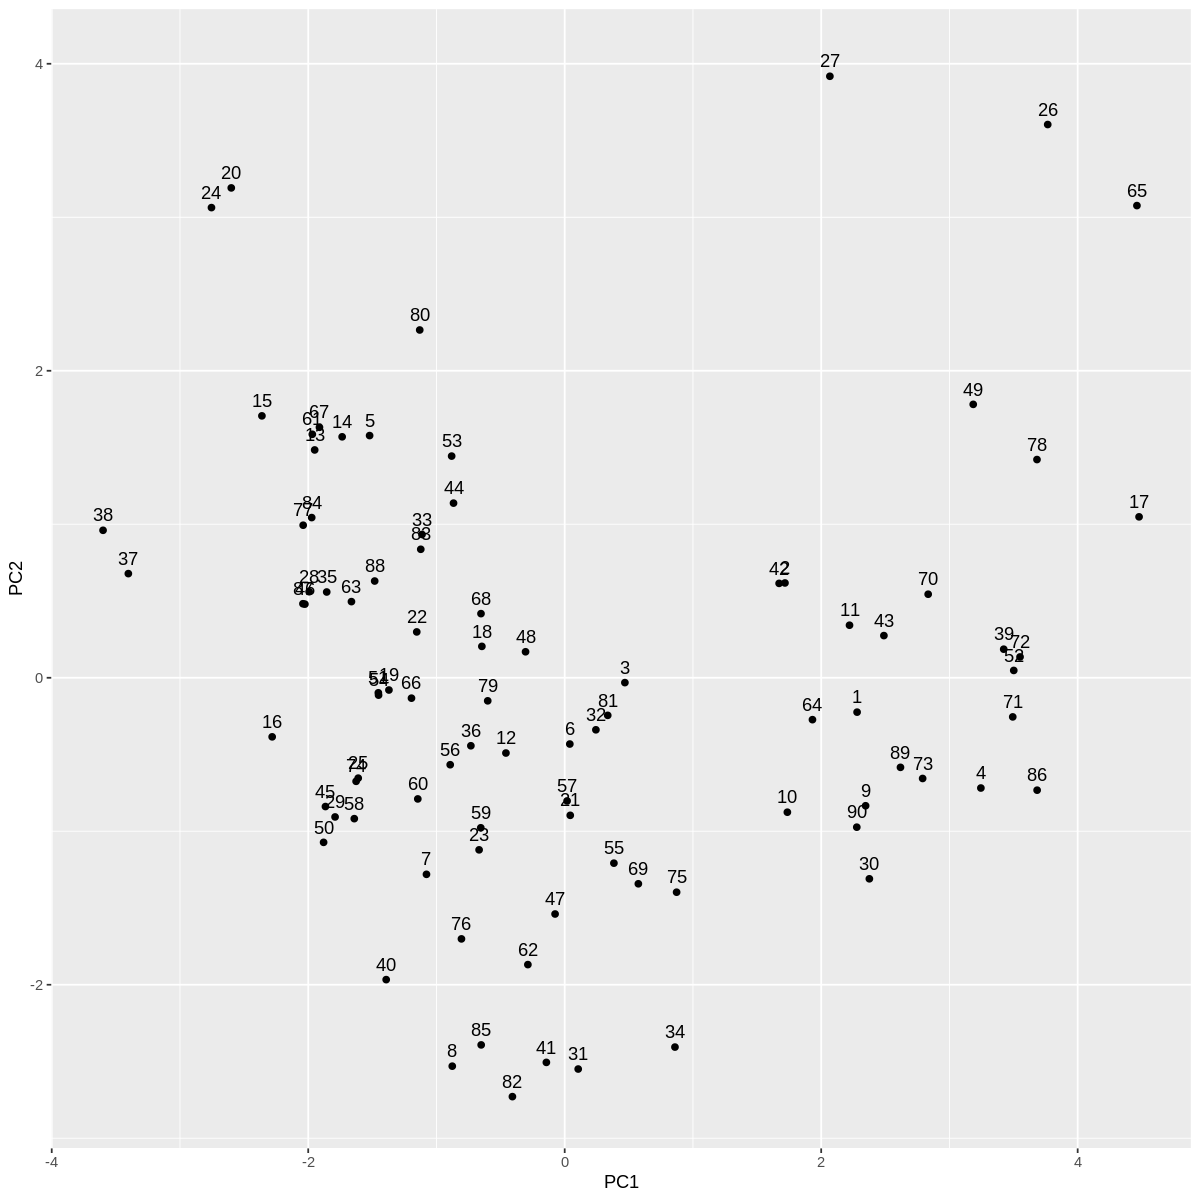

In [ ]:
railtrail1 %>%
  ggplot(aes(PC1, PC2, label = rownames(railtrail))) +
  geom_point() +
  geom_text(nudge_y = .1)